# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# For reading and manipulating data
import pandas as pd
import numpy as np

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For missing value imputation
from sklearn.impute import SimpleImputer

# For building different types of models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# For undersampling and oversampling the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For getting different metric scores, and splitting the data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# For data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For defining maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# For supressing scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# For supressing warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [2]:
# Reading in the training data
df = pd.read_csv("Train.csv")
df

V1      V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0     -4.465  -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1     -2.910  -2.569  4.109  1.317 -1.621 -3.827 -1.617  0.669  0.387  0.854   
2      4.284   5.105  6.092  2.640 -1.041  1.308 -1.876 -9.582  3.470  0.763   
3      3.366   3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
4     -3.832  -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
...      ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995 -3.897  -3.942 -0.351 -2.417  1.108 -1.528 -3.520  2.055 -0.234 -0.358   
39996 -3.187 -10.052  5.696 -4.370 -5.355 -1.873 -3.947  0.679 -2.389  5.457   
39997 -2.687   1.961  6.137  2.600  2.657 -4.291 -2.344  0.974 -1.027  0.497   
39998  0.521   0.096  8.457  2.138 -1.636 -2.713 -2.693 -3.410  1.936  2.012   
39999  2.403  -1.336  6.451 -5.356 -0.434  0.255 -1.120 -2.523 -0.654  2.316   

         V11    V12    V13    V14    V15     V16    V17   V18    V19    V20  \
0     -5.715  0.736  0.981  1.418 -3.376  -3.047  0.306 2.914  2.270  4.395   
1     -6.353  4.272  3.162  0.258 -3.547  -4.285  2.897 1.508  3.668  7.124   
2     -2.573 -3.350 -0.595 -5.247 -4.310 -16.232 -1.000 2.318  5.942 -3.858   
3      1.914 -0.951 -1.255 -2.707  0.193  -4.769 -2.205 0.908  0.757 -5.834   
4     -0.771  1.107  1.144  0.943 -3.164  -4.248 -4.039 3.689  3.311  1.059   
...      ...    ...    ...    ...    ...     ...    ...   ...    ...    ...   
39995 -3.782  2.180  6.112  1.985 -8.330  -1.639 -0.915 5.672 -3.924  2.133   
39996  1.583  3.571  9.227  2.554 -7.039  -0.994 -9.665 1.155  3.877  3.524   
39997 -9.589  3.177  1.055 -1.416 -4.669  -5.405  3.720 2.893  2.329  1.458   
39998 -4.989 -0.819  4.166 -1.192 -5.033  -8.523 -1.950 0.017  4.505  2.031   
39999 -2.862  0.199  1.593 -0.337 -0.709  -4.408 -3.683 2.973 -1.223 -1.958   

          V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0      -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1      -4.096  1.015 -0.970 -0.968  2.064 -1.646  0.427  0.735 -4.470 -2.772   
2     -11.599  4.021 -6.281  4.633  0.930  6.280  0.851  0.269 -2.206 -1.329   
3      -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
4      -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995  -4.502  2.777  5.728  1.620 -1.700 -0.042 -2.923 -2.760 -2.254  2.552   
39996  -7.015 -0.132 -3.446 -4.801 -0.876 -3.812  5.422 -3.732  0.609  5.256   
39997  -6.429  1.818  0.806  7.786  0.331  5.257 -4.867 -0.819 -5.667 -2.861   
39998  -8.849  0.566 -6.040 -0.043  1.656  4.250  1.727 -1.686 -3.963 -2.642   
39999  -4.454  0.464 -4.952 -1.624  2.965  2.009  5.712 -2.910 -2.287 -3.676   

         V31    V32    V33    V34   V35    V36    V37    V38    V39    V40  \
0      1.667  3.060 -1.690  2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1     -2.505 -3.783 -6.823  4.909 0.482  5.338  2.381 -3.128  3.527 -3.020   
2     -2.399 -3.098  2.690 -1.643 7.566 -3.198 -3.496  8.105  0.562 -4.227   
3      0.025 -1.795  3.033 -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
4     -1.600 -0.257  0.804  4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
39995  0.982  7.112  1.476 -3.954 1.856  5.029  2.083 -6.409  1.477 -0.874   
39996  1.915  0.403  3.164  3.752 8.530  8.451  0.204 -7.130  4.249 -6.112   
39997  4.674  6.621 -1.989 -1.349 3.952  5.450 -0.455 -2.202  1.678 -1.974   
39998  1.939 -1.257 -1.136  1.434 5.905  3.752 -1.867 -1.918  2.573 -5.019   
39999  5.678 -4.310 -0.709 -1.359 1.639  7.766 -0.245 -1.124  2.872  1.902   

       Target  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
39995       0  
39996       0  
39997       0  
39998       0  
39999       0  

[40000 ro

In [3]:
# Making a copy of the dataframe
data = df.copy()

In [4]:
# Shape of the dataframe
print(f"The shape of the dataframe is {data.shape}. \nThere are {data.shape[0]} rows and {data.shape[1]} columns")

The shape of the dataframe is (40000, 41). 
There are 40000 rows and 41 columns


In [5]:
# Getting info on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

In [6]:
# Looking at the first five rows
data.head()

V1     V2    V3     V4     V5     V6     V7     V8     V9    V10    V11  \
0 -4.465 -4.679 3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762 -5.715   
1 -2.910 -2.569 4.109  1.317 -1.621 -3.827 -1.617  0.669  0.387  0.854 -6.353   
2  4.284  5.105 6.092  2.640 -1.041  1.308 -1.876 -9.582  3.470  0.763 -2.573   
3  3.366  3.653 0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101  1.914   
4 -3.832 -5.824 0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393 -0.771   

     V12    V13    V14    V15     V16    V17   V18   V19    V20     V21   V22  \
0  0.736  0.981  1.418 -3.376  -3.047  0.306 2.914 2.270  4.395  -2.388 0.646   
1  4.272  3.162  0.258 -3.547  -4.285  2.897 1.508 3.668  7.124  -4.096 1.015   
2 -3.350 -0.595 -5.247 -4.310 -16.232 -1.000 2.318 5.942 -3.858 -11.599 4.021   
3 -0.951 -1.255 -2.707  0.193  -4.769 -2.205 0.908 0.757 -5.834  -3.065 1.597   
4  1.107  1.144  0.943 -3.164  -4.248 -4.039 3.689 3.311  1.059  -2.143 1.650   

     V23    V24    V25    V26    V27    V28    V29    V30    V31    V32  \
0 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073  1.667  3.060   
1 -0.970 -0.968  2.064 -1.646  0.427  0.735 -4.470 -2.772 -2.505 -3.783   
2 -6.281  4.633  0.930  6.280  0.851  0.269 -2.206 -1.329 -2.399 -3.098   
3 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201  0.025 -1.795   
4 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841 -1.600 -0.257   

     V33    V34   V35    V36    V37    V38    V39    V40  Target  
0 -1.690  2.846 2.235  6.667  0.444 -2.369  2.951 -3.480       0  
1 -6.823  4.909 0.482  5.338  2.381 -3.128  3.527 -3.020       0  
2  2.690 -1.643 7.566 -3.198 -3.496  8.105  0.562 -4.227       0  
3  3.033 -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616       0  
4  0.804  4.086 2.292  5.361  0.352  2.940  3.839 -4.309       0

In [7]:
# Looking at a random sample of 10 rows
data.sample(10)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
28784 -0.652  3.027  2.247  0.119  1.157 -0.294  1.365  0.766 -2.791 -0.445   
32611  3.221  2.259  8.203  2.690 -2.219 -3.095 -0.905 -3.810  2.987  1.266   
24080 -2.039 -2.021  6.411  1.601 -1.230 -2.885 -2.708 -0.885  0.514  2.106   
31262  5.305 -1.589 -0.631 -1.617 -2.272  1.034  0.223 -1.066  0.471  1.761   
24892 -2.095  0.072  1.606  1.677 -0.167 -2.990  0.699  3.951 -2.324 -0.473   
11774  0.224 -2.458 11.375 -0.923 -1.705 -5.154 -2.100  0.343 -0.368  3.767   
23638  1.793  1.577  6.457  1.420 -2.069  0.047 -2.172 -6.847  2.697  2.223   
31931  5.680  6.943  7.912  2.151 -0.508 -0.143  0.222 -8.540  4.666  0.154   
30444 -4.505 -1.169 -2.244 -0.496  2.031  0.285 -2.243  1.432 -1.841 -0.454   
31278 -2.108  1.600 -0.003 -0.605  1.006 -0.275  0.201  0.997 -1.411 -1.243   

         V11    V12    V13    V14    V15     V16    V17    V18    V19    V20  \
28784 -0.369  3.673 -4.023 -2.903  3.272   1.025  2.299 -0.424  2.647 -2.152   
32611 -4.673  0.061  3.976 -1.666 -3.134  -9.029 -1.159 -1.853  5.640  1.621   
24080 -4.522  0.274  3.864  0.135 -4.457  -4.408 -1.286  0.269  3.215  3.600   
31262  1.999 -1.871 -0.110  0.839  1.131  -2.126 -2.834 -0.379  0.869 -1.841   
24892 -2.368  5.420 -1.207 -0.728  1.574   2.647  3.908 -1.229  3.398  3.215   
11774 -7.517  2.718  6.101  0.998 -3.395  -4.083 -3.117 -0.679  3.526  3.539   
23638 -0.011 -2.559  4.916 -2.250 -5.966  -9.999 -6.153 -0.424  4.821 -2.725   
31931 -3.540 -3.134  1.298 -3.960 -1.634 -12.651 -1.405 -1.087  4.006 -3.320   
30444  0.220  1.561  1.952 -0.038 -5.475   0.619 -1.011  3.686 -1.786 -1.819   
31278  1.428  3.609  1.725 -1.360 -2.012   1.489 -0.988  0.376  0.226 -2.355   

         V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
28784  0.976 -1.113 -1.579  3.512 -0.138  2.029 -2.338  0.696  1.937  0.179   
32611 -8.845  1.044 -5.939 -1.499  2.736  4.903  3.617 -1.065 -5.156 -5.057   
24080 -5.555 -0.394 -4.093 -0.247  0.930  1.728  0.514 -1.295 -3.010 -1.320   
31262 -2.735  2.509  0.330 -0.042  1.017 -2.112  4.291 -0.082 -0.573  0.733   
24892  0.713 -0.763  0.984  1.835  0.242 -0.901 -2.807  1.147 -0.050  0.272   
11774 -7.499 -0.860 -6.212 -2.265  3.523  3.494  5.096 -3.328 -6.571 -6.016   
23638 -9.628  1.122 -6.437 -0.498 -0.414  5.821  2.970 -2.193 -1.648 -0.316   
31931 -8.541  1.269 -8.310 -0.975  3.128  8.629  4.573 -0.919 -4.745 -7.561   
30444 -1.667  1.463  5.177  5.190 -4.125  1.110 -5.904 -1.375  1.710  5.737   
31278 -0.759 -0.226  1.919  1.267 -2.450  2.817 -2.890 -1.389  1.972  2.613   

         V31    V32    V33    V34   V35    V36    V37    V38    V39    V40  \
28784  1.832 -1.263  0.642  0.743 0.743  0.225 -0.062  3.824  0.022  2.211   
32611  0.322 -4.713 -4.414  2.753 4.390  2.069 -1.928 -0.390  2.320 -4.858   
24080  2.003  0.375 -1.130  2.138 4.185  4.822 -0.632 -3.650  2.646 -4.228   
31262  0.500  0.453  0.556 -0.981 3.378 -1.384 -1.793 -0.073 -1.621 -0.696   
24892  0.055 -0.129 -3.221  3.178 0.535  1.398  1.326 -1.335  0.367  0.152   
11774  7.207 -1.999 -5.380  3.271 4.304 11.001 -0.829 -6.884  4.616 -3.563   
23638 -0.106 -1.307  3.540  0.125 7.145 -0.143 -3.393  2.711  2.019 -6.340   
31931 -0.108 -8.081 -2.828  0.265 2.131 -0.593 -3.024  5.846  1.993 -2.784   
30444  0.731  9.612  6.442 -4.157 3.147  0.095  0.283 -0.943 -0.454 -0.875   
31278  0.121  2.136  2.882 -1.235 1.084 -0.329  0.438  0.952  0.335  0.142   

       Target  
28784       0  
32611       0  
24080       0  
31262       1  
24892       0  
11774       0  
23638       0  
31931       0  
30444       0  
31278       0

In [8]:
# Determining if there are any missing values in the dataframe
# Total missing values for each column sorted in descending order
print(data.isnull().sum().sort_values(ascending=False))

V1        46
V2        39
V40        0
V30        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V31        0
V39        0
V22        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V32        0
V21        0
V20        0
V10        0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V11        0
V19        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
Target     0
dtype: int64


In [9]:
# Any missing values?
print("True or False, are there any missing values?", data.isnull().values.any())

True or False, are there any missing values? True


In [10]:
# Total number of missing values (if any)
print("Total number of missing values (if any) is", data.isnull().sum().sum())

Total number of missing values (if any) is 85


In [11]:
# Number of unique values in each column sorted in descending order
print(data.nunique().sort_values(ascending=False))

V21       40000
V30       40000
V23       40000
V24       40000
V25       40000
V26       40000
V27       40000
V28       40000
V29       40000
V31       40000
V40       40000
V32       40000
V33       40000
V34       40000
V35       40000
V36       40000
V37       40000
V38       40000
V22       40000
V20       40000
V11       40000
V10       40000
V3        40000
V4        40000
V5        40000
V6        40000
V7        40000
V8        40000
V9        40000
V39       40000
V19       40000
V12       40000
V13       40000
V14       40000
V16       40000
V17       40000
V18       40000
V15       39999
V2        39961
V1        39954
Target        2
dtype: int64


### Observations

* There are 40,000 rows and 41 columns.
    * 40 of the columns are datatype float and represent 40 different sensors. The Target column is datatype int.
* Columns V1 and V2 have missing values. All other columns have no missing values.
    * The missing values will be addressed later on.
* For the sensor columns V15, V2, and V1 are the only ones that have some duplicate values, however the number of duplicate values is nominal compared to the total unique values.

## EDA

### Univariate Analysis

In [12]:
# Viewing summary statistics of the data
data.describe().T

count   mean   std     min    25%    50%    75%    max
V1     39954.000 -0.288 3.449 -13.502 -2.751 -0.774  1.837 17.437
V2     39961.000  0.443 3.139 -13.212 -1.638  0.464  2.538 13.089
V3     40000.000  2.506 3.406 -11.469  0.203  2.265  4.585 18.366
V4     40000.000 -0.066 3.437 -16.015 -2.350 -0.124  2.149 13.280
V5     40000.000 -0.045 2.107  -8.613 -1.507 -0.097  1.346  9.403
V6     40000.000 -1.001 2.037 -10.227 -2.363 -1.007  0.374  7.065
V7     40000.000 -0.893 1.757  -8.206 -2.037 -0.935  0.207  8.006
V8     40000.000 -0.563 3.299 -15.658 -2.660 -0.384  1.714 11.679
V9     40000.000 -0.008 2.162  -8.596 -1.494 -0.052  1.426  8.507
V10    40000.000 -0.002 2.183 -11.001 -1.391  0.106  1.486  8.108
V11    40000.000 -1.918 3.116 -14.832 -3.941 -1.942  0.089 13.852
V12    40000.000  1.578 2.915 -13.619 -0.431  1.485  3.541 15.754
V13    40000.000  1.591 2.865 -13.830 -0.209  1.654  3.476 15.420
V14    40000.000 -0.947 1.788  -8.309 -2.165 -0.957  0.266  6.213
V15    40000.000 -2.436 3.341 -17.202 -4.451 -2.399 -0.382 12.875
V16    40000.000 -2.943 4.212 -21.919 -5.632 -2.719 -0.113 13.583
V17    40000.000 -0.143 3.344 -17.634 -2.227 -0.028  2.072 17.405
V18    40000.000  1.189 2.586 -11.644 -0.403  0.867  2.564 13.180
V19    40000.000  1.181 3.395 -13.492 -1.051  1.278  3.497 16.059
V20    40000.000  0.027 3.675 -13.923 -2.434  0.030  2.513 16.052
V21    40000.000 -3.621 3.557 -19.436 -5.921 -3.559 -1.284 13.840
V22    40000.000  0.943 1.646 -10.122 -0.112  0.963  2.018  7.410
V23    40000.000 -0.388 4.052 -16.188 -3.119 -0.275  2.438 15.080
V24    40000.000  1.142 3.913 -18.488 -1.483  0.964  3.563 19.769
V25    40000.000 -0.003 2.025  -8.228 -1.373  0.021  1.400  8.223
V26    40000.000  1.896 3.421 -12.588 -0.319  1.964  4.163 16.836
V27    40000.000 -0.617 4.392 -14.905 -3.692 -0.910  2.201 21.595
V28    40000.000 -0.888 1.925  -9.685 -2.193 -0.905  0.377  6.907
V29    40000.000 -1.005 2.676 -12.579 -2.799 -1.206  0.604 11.852
V30    40000.000 -0.033 3.031 -14.796 -1.908  0.185  2.040 13.191
V31    40000.000  0.506 3.483 -19.377 -1.799  0.491  2.778 17.255
V32    40000.000  0.327 5.499 -23.201 -3.392  0.056  3.789 24.848
V33    40000.000  0.057 3.574 -17.454 -2.238 -0.050  2.256 16.692
V34    40000.000 -0.464 3.186 -17.985 -2.128 -0.251  1.433 14.358
V35    40000.000  2.235 2.924 -15.350  0.332  2.110  4.045 16.805
V36    40000.000  1.530 3.820 -17.479 -0.937  1.572  3.997 19.330
V37    40000.000 -0.000 1.778  -7.640 -1.266 -0.133  1.161  7.803
V38    40000.000 -0.351 3.964 -17.375 -3.017 -0.319  2.291 15.964
V39    40000.000  0.900 1.751  -7.136 -0.262  0.921  2.069  7.998
V40    40000.000 -0.897 2.998 -11.930 -2.950 -0.949  1.092 10.654
Target 40000.000  0.055 0.227   0.000  0.000  0.000  0.000  1.000

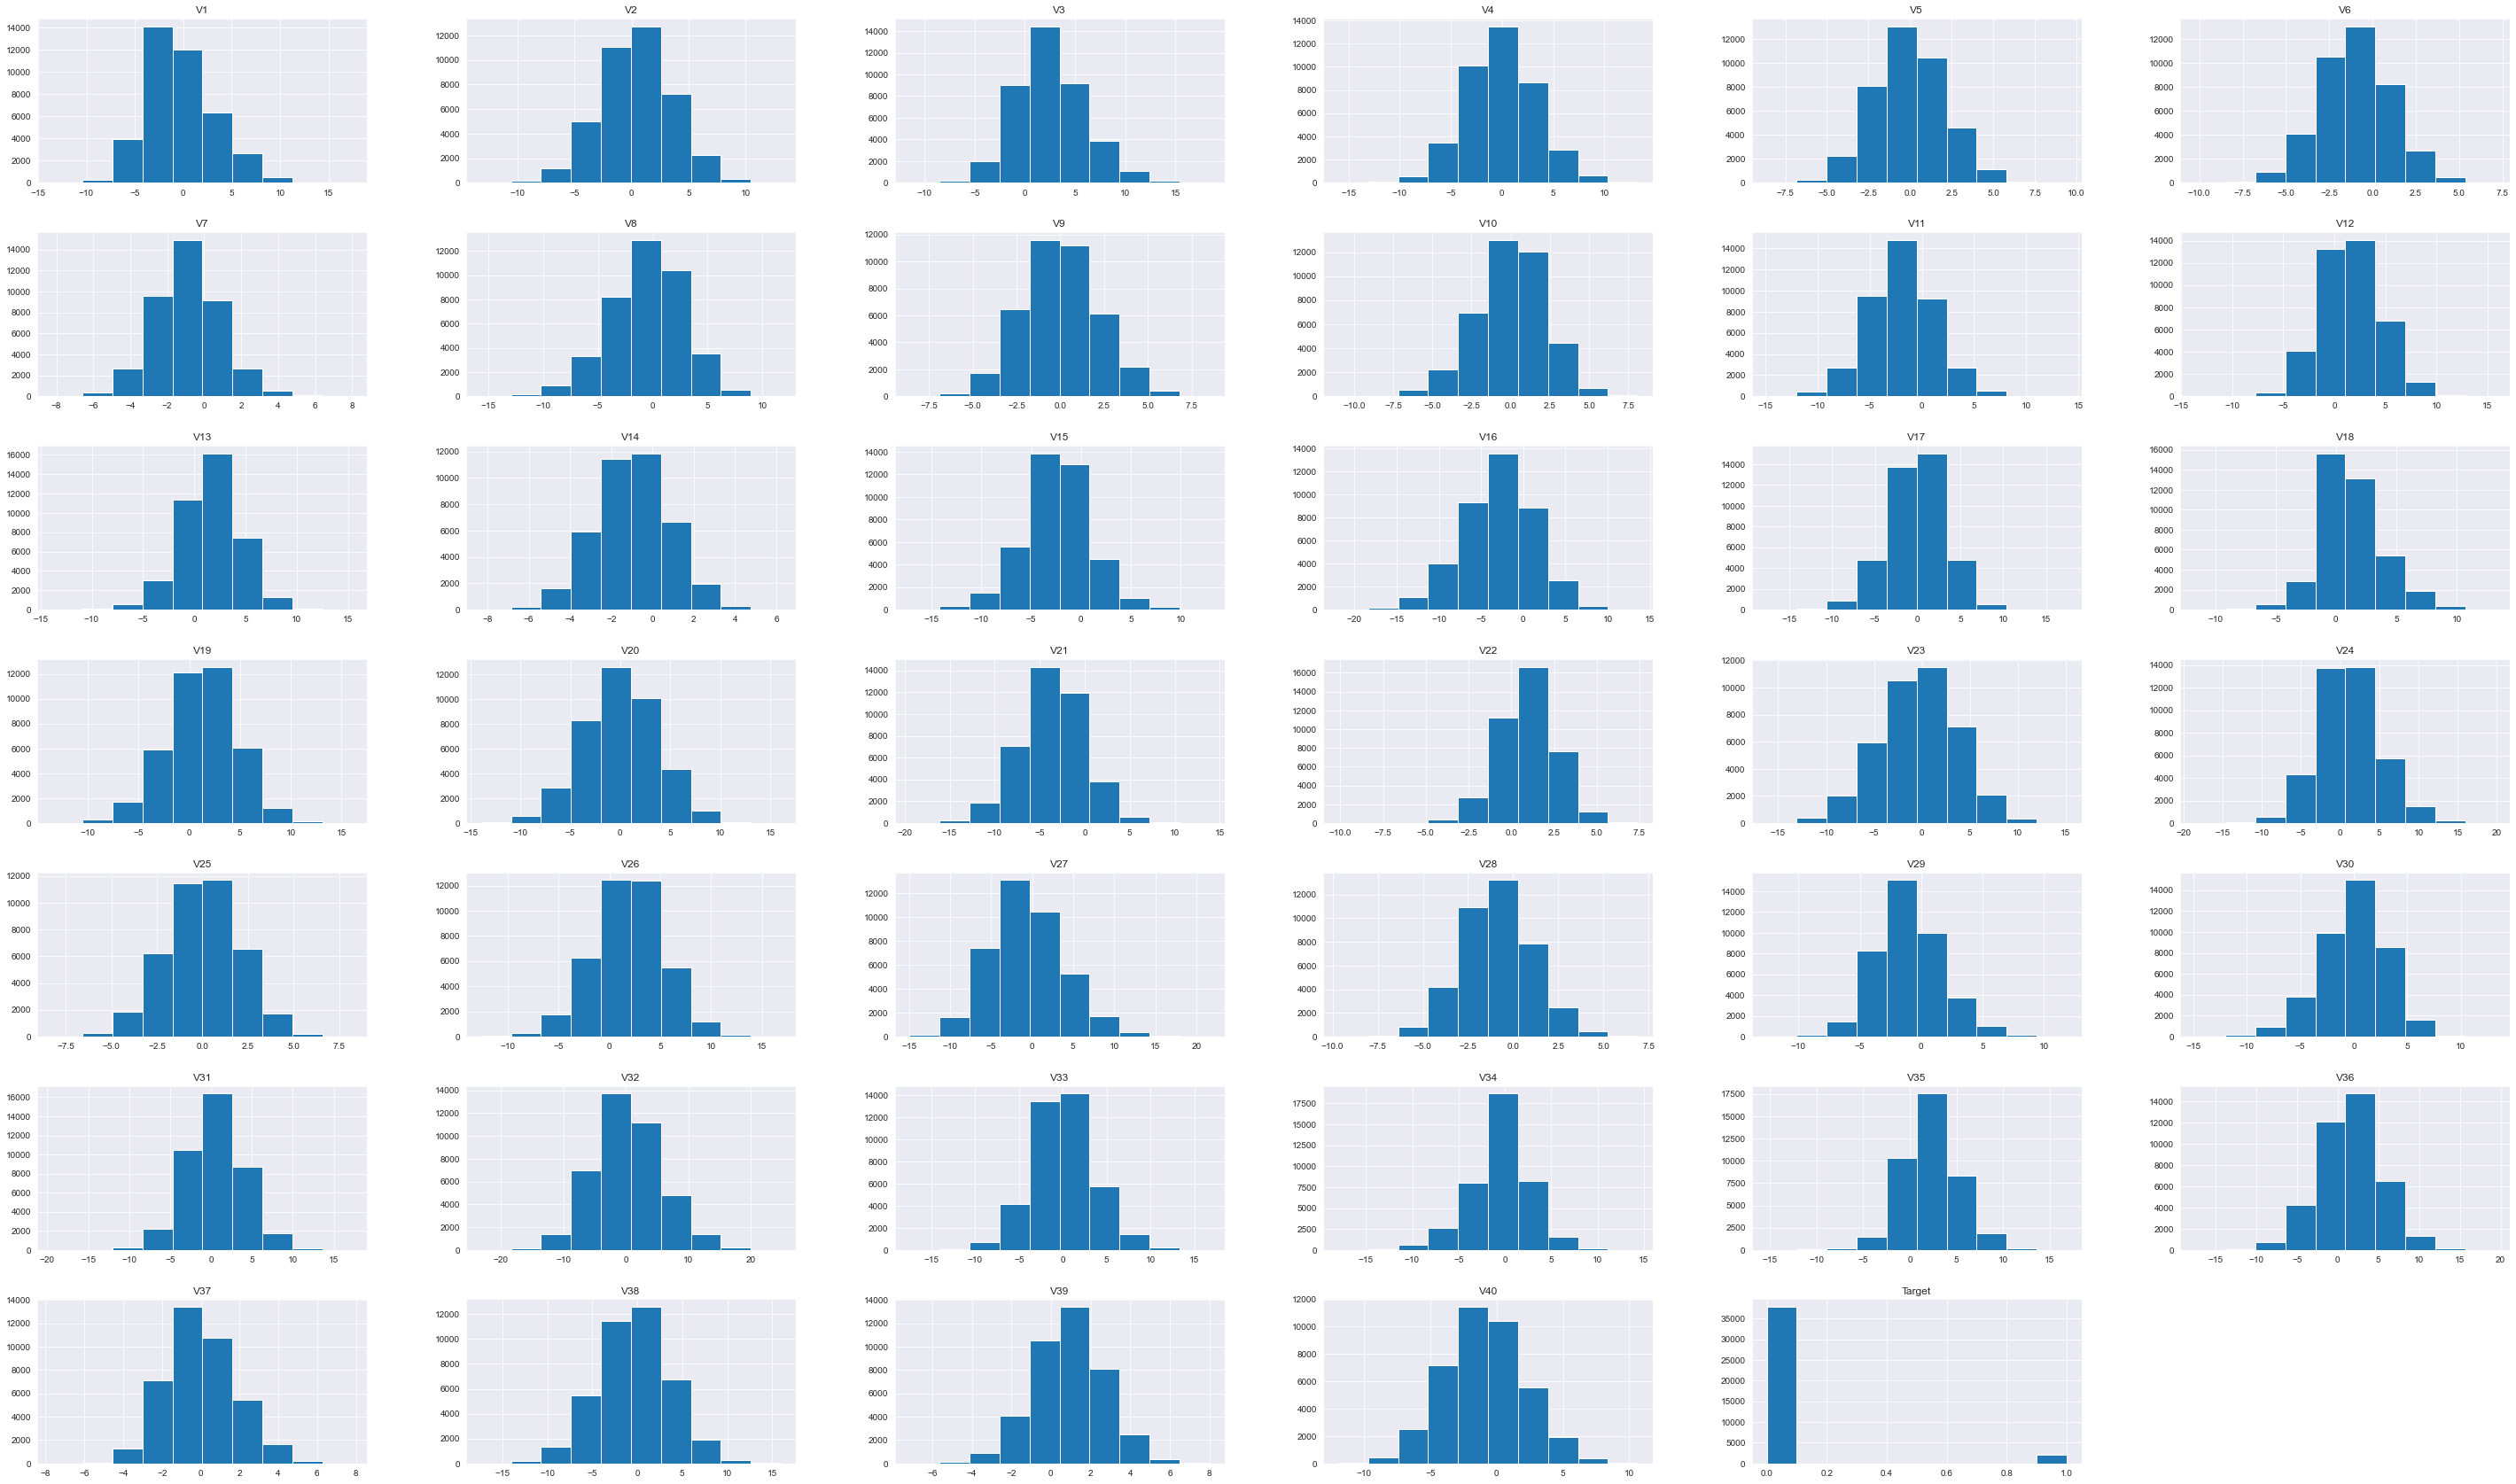

In [13]:
# Distribution of numerical variables
sns.set_style("darkgrid")
data.hist(figsize = (50, 30))
plt.show()

### Plotting histograms and boxplots for all the variables

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x=feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

### Plotting all the features in one go with a for loop

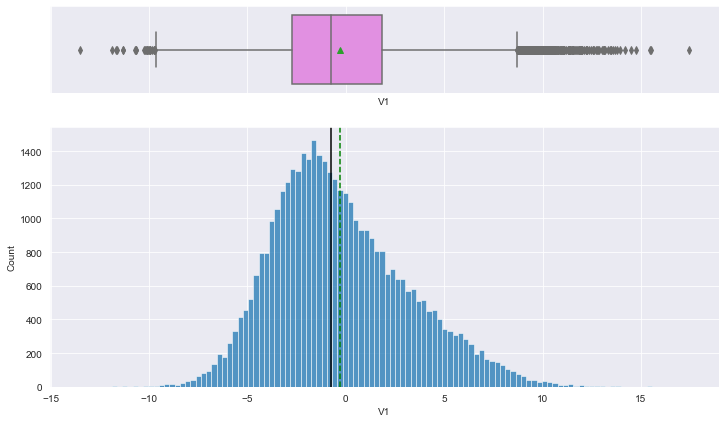

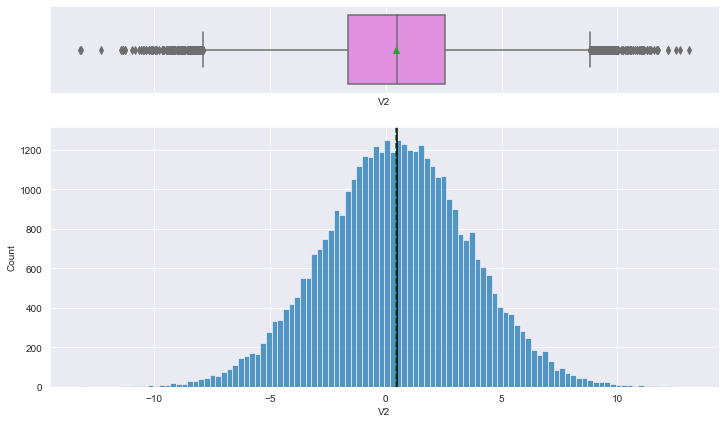

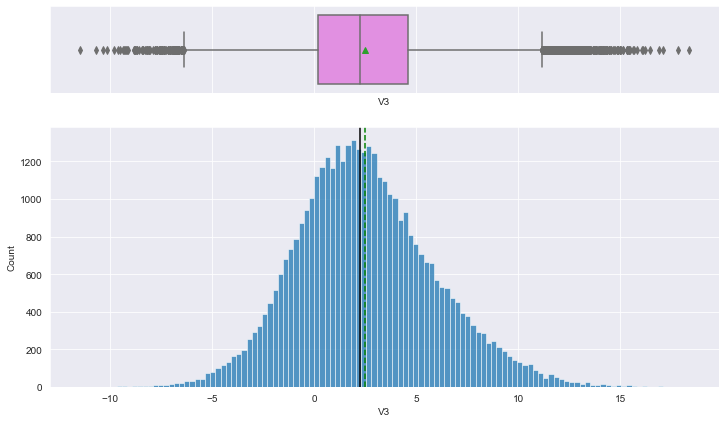

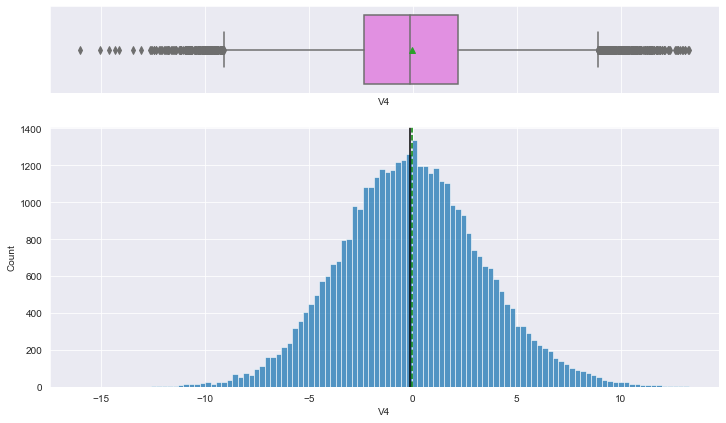

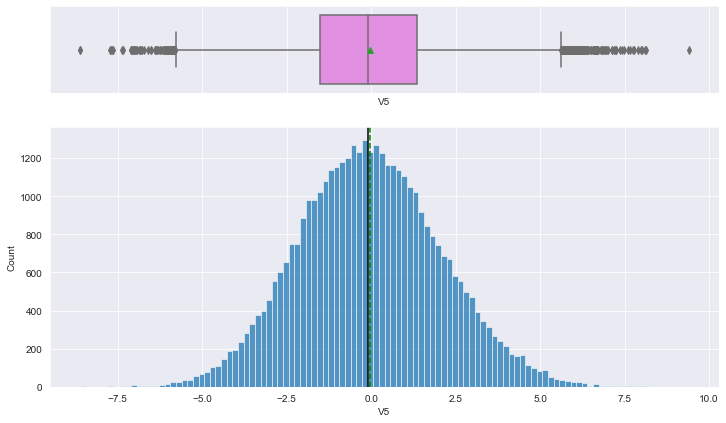

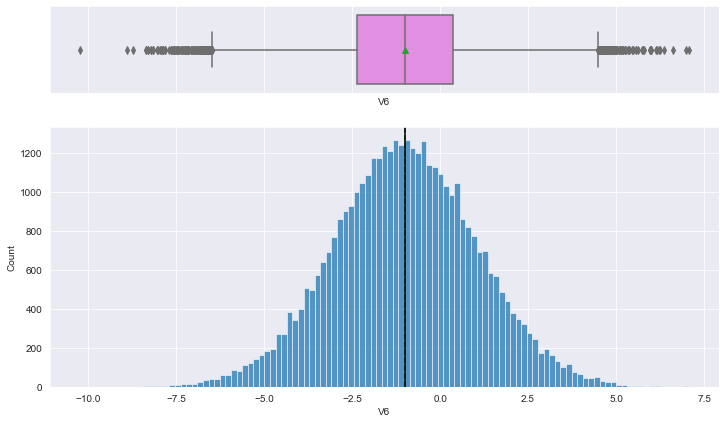

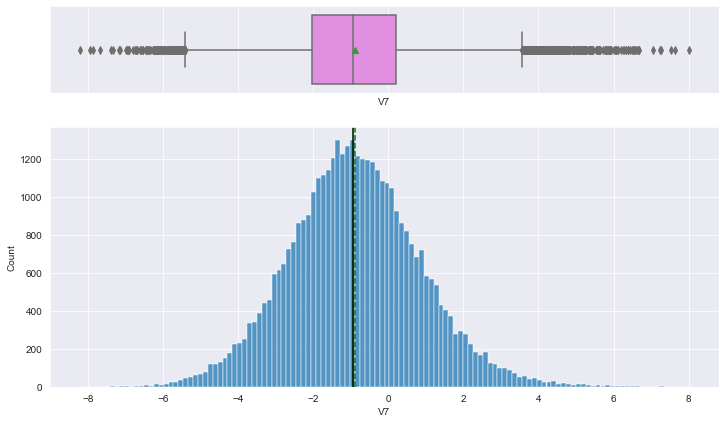

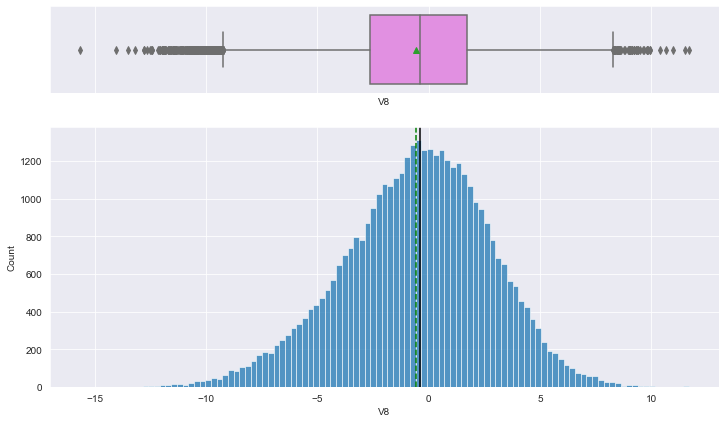

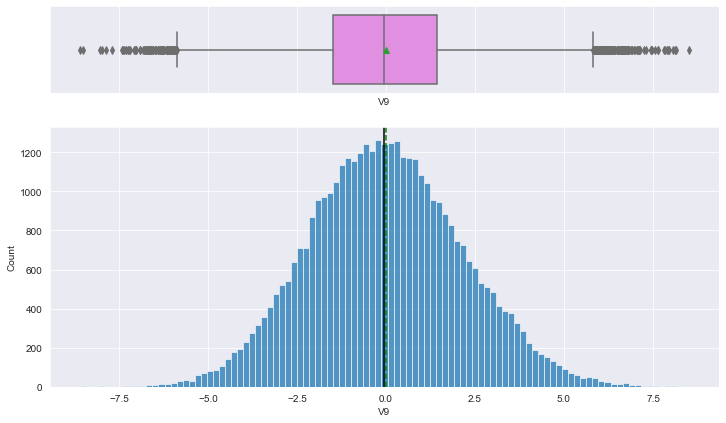

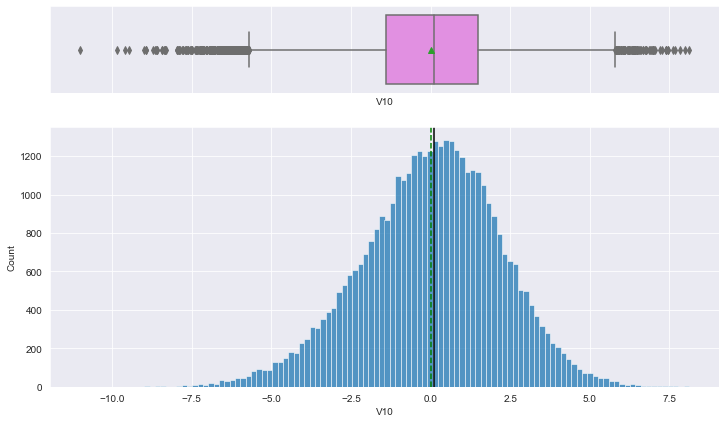

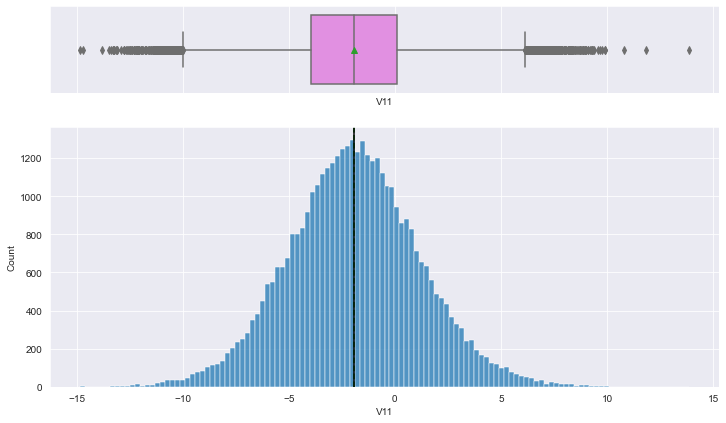

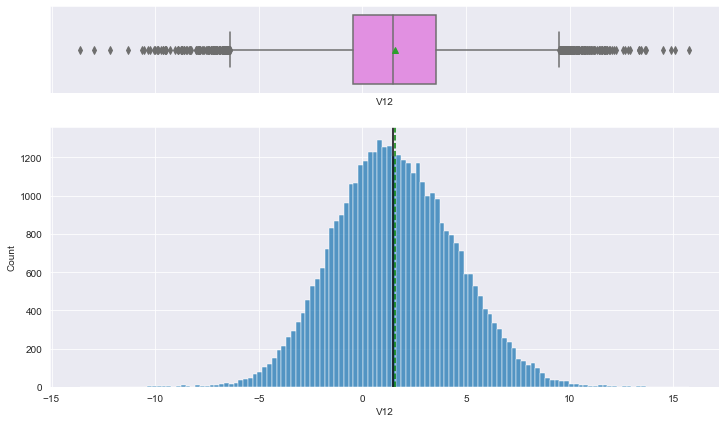

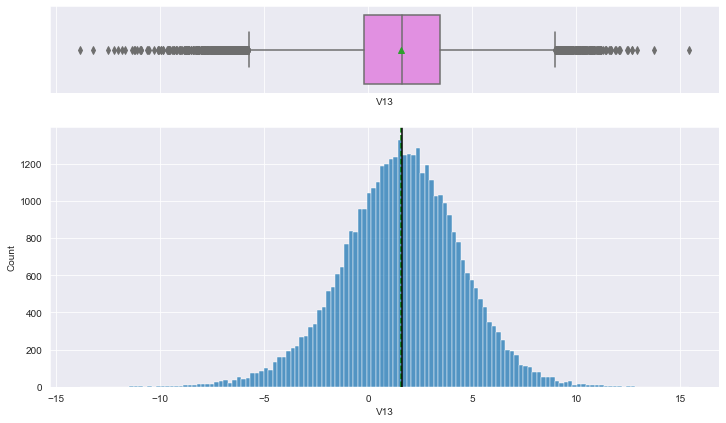

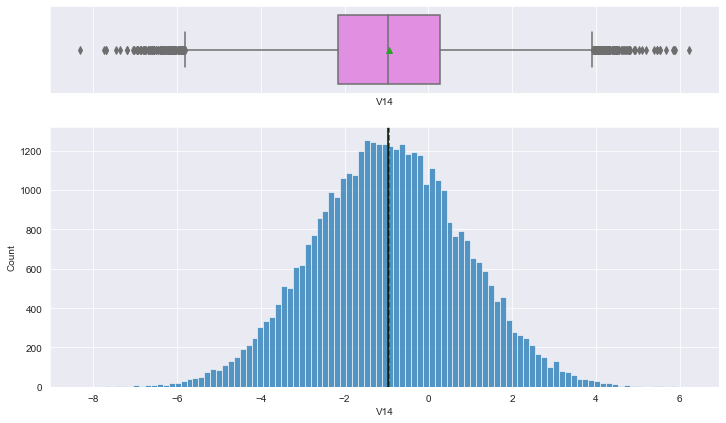

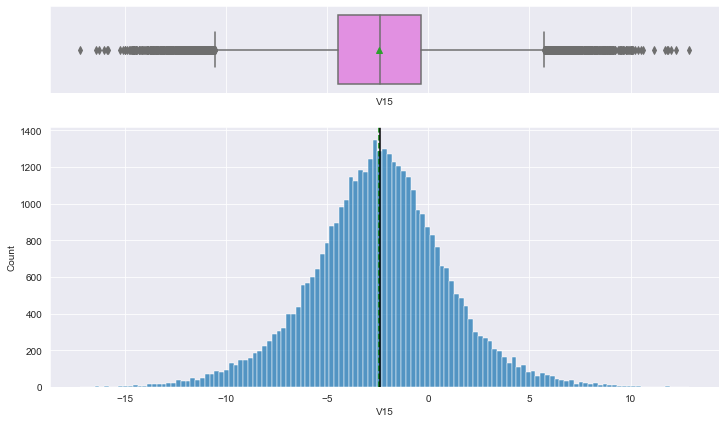

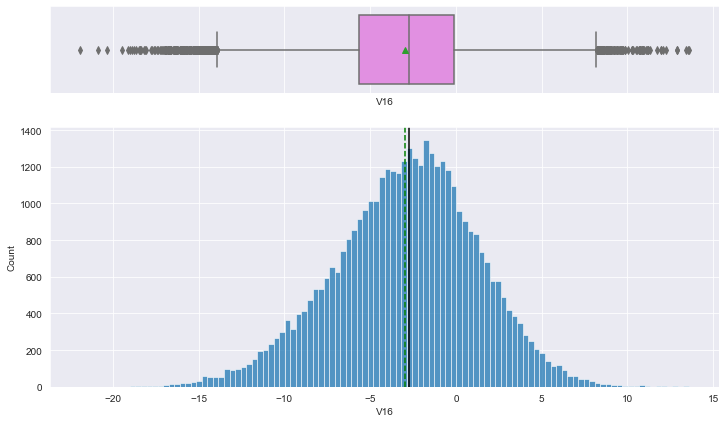

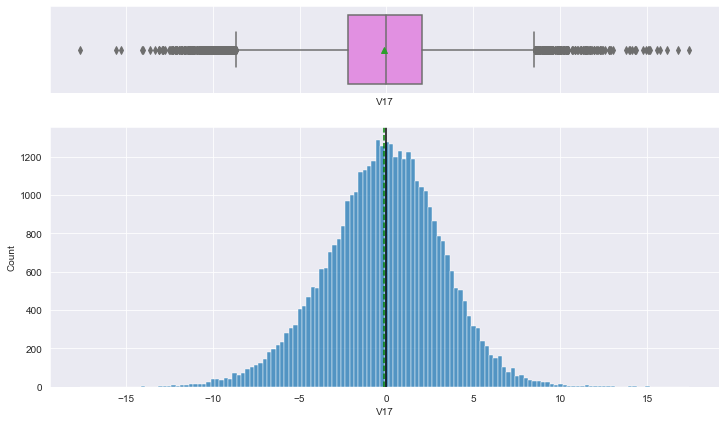

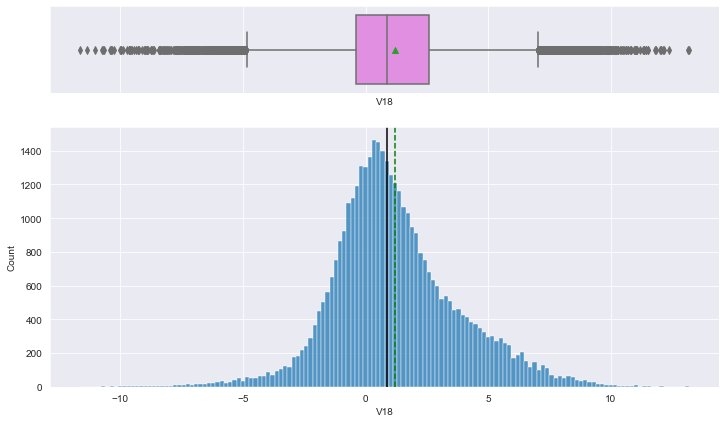

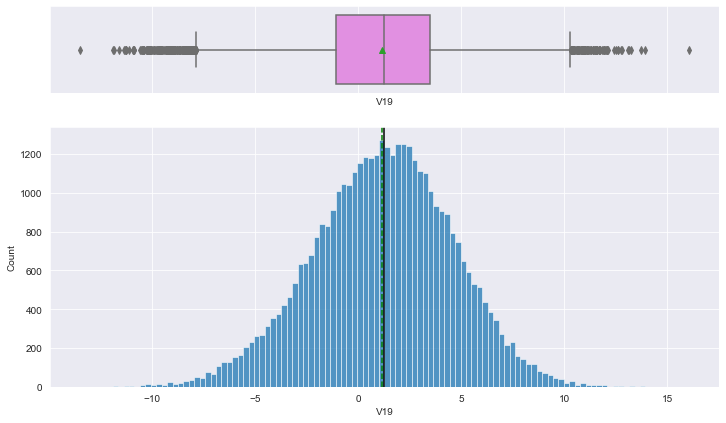

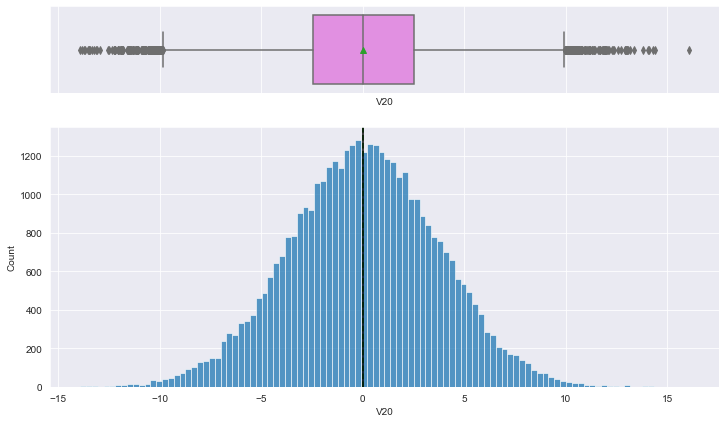

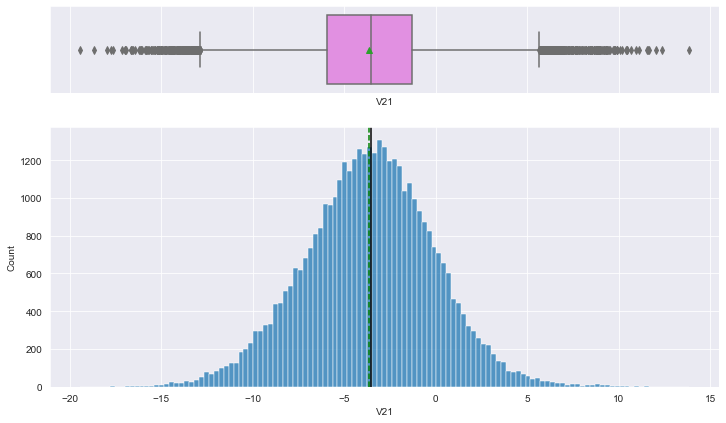

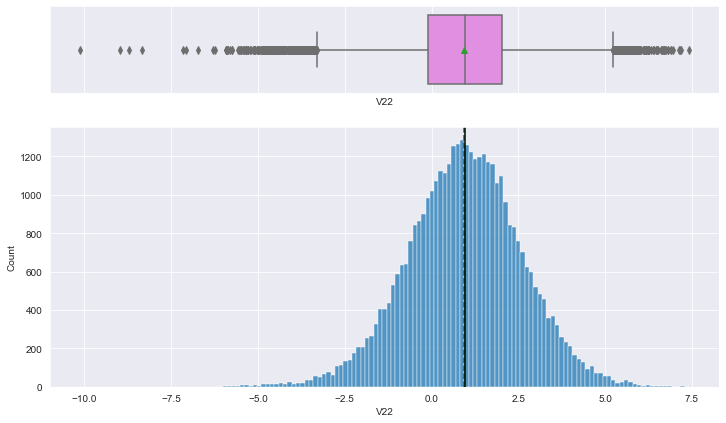

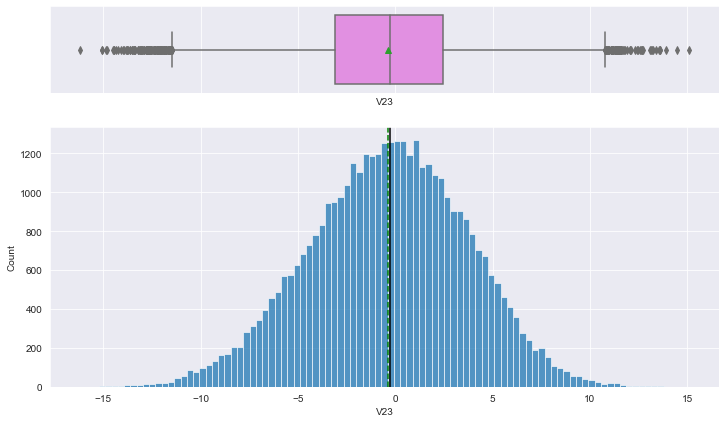

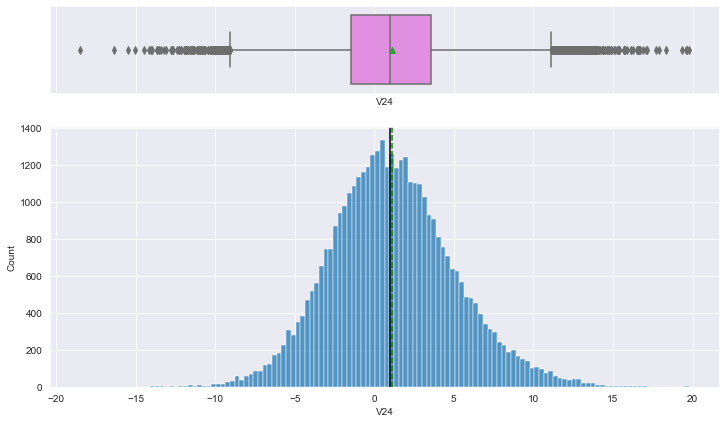

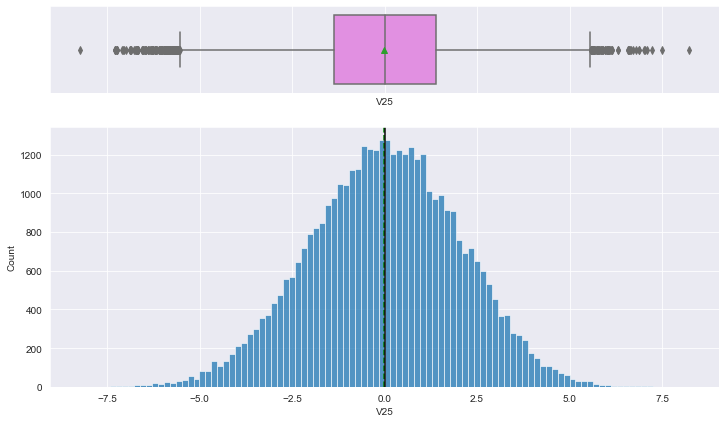

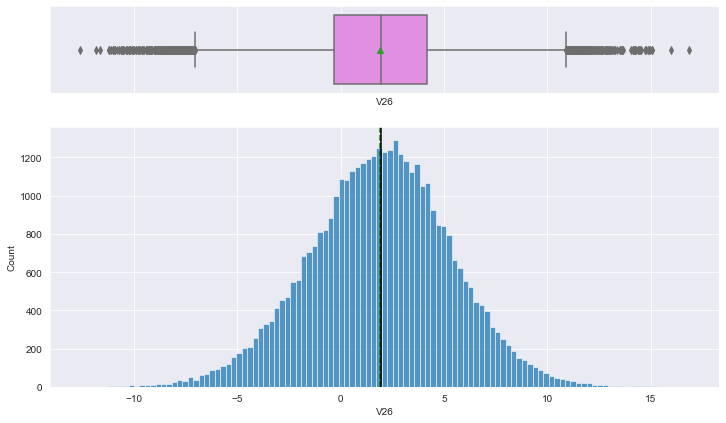

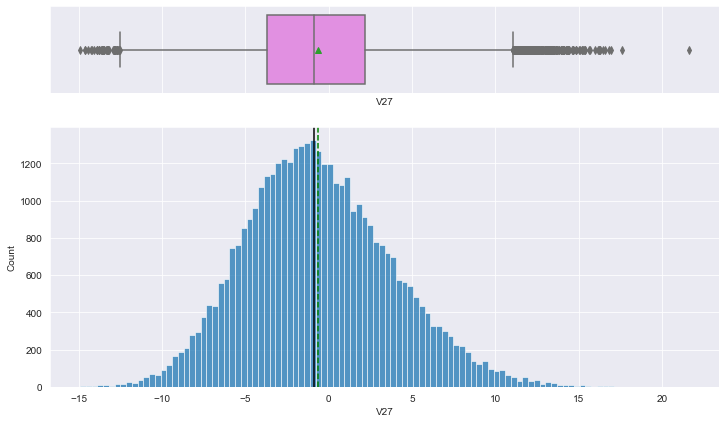

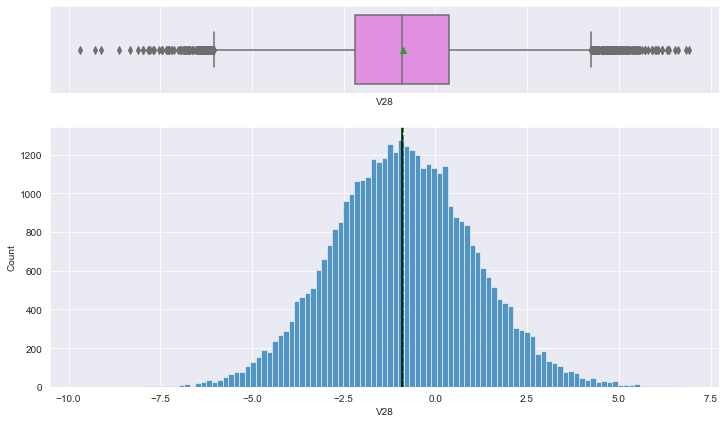

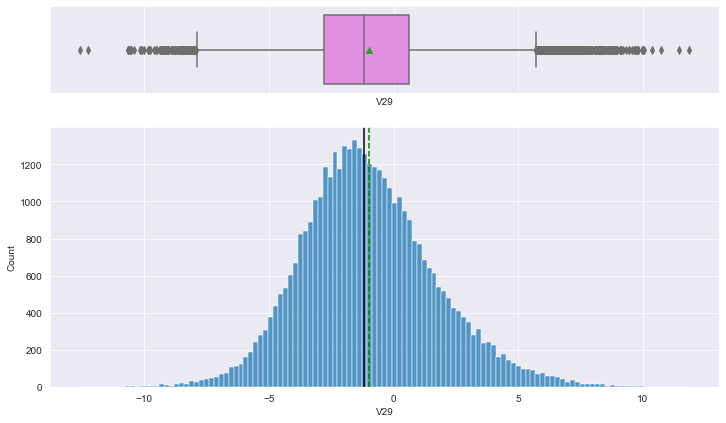

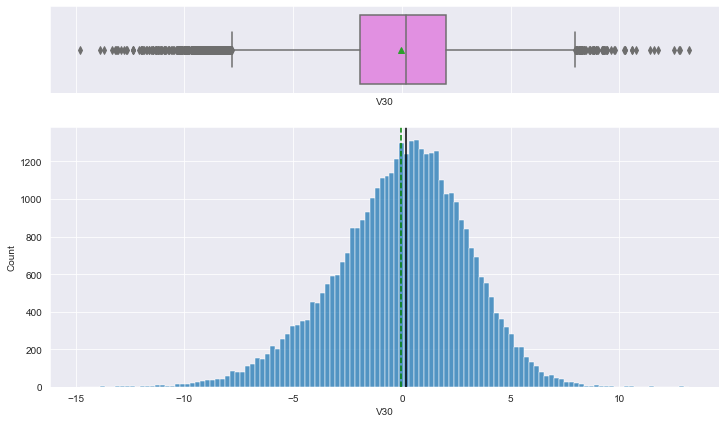

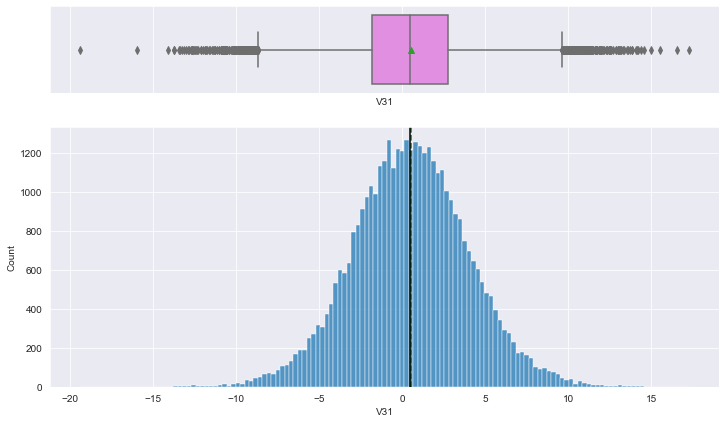

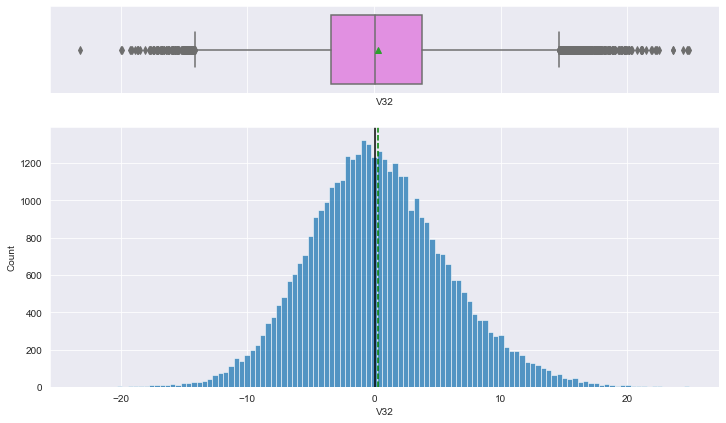

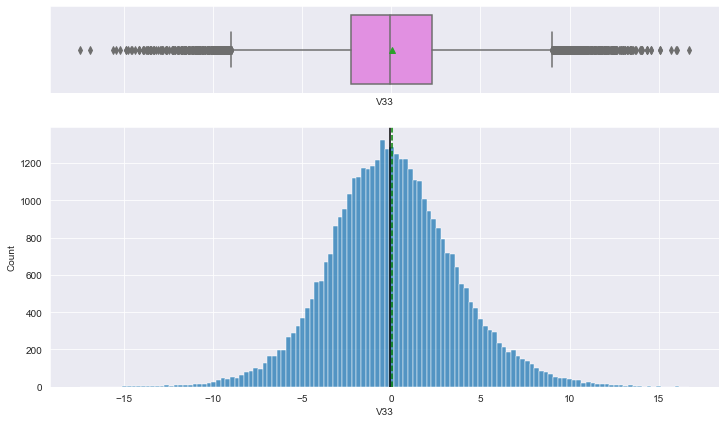

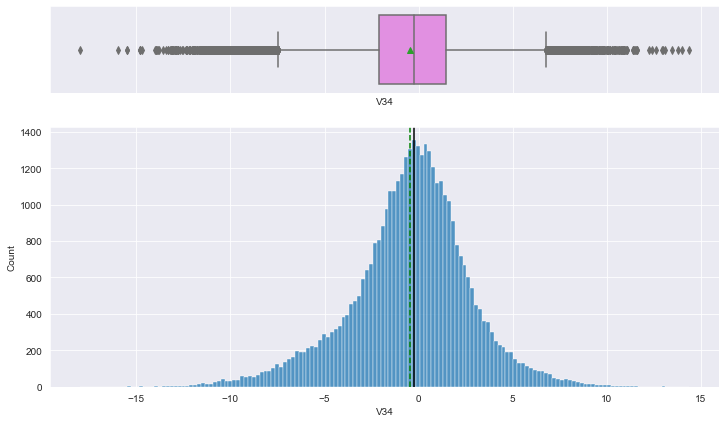

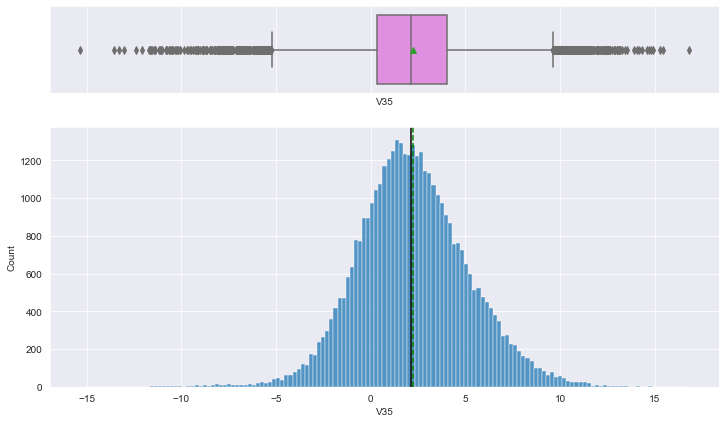

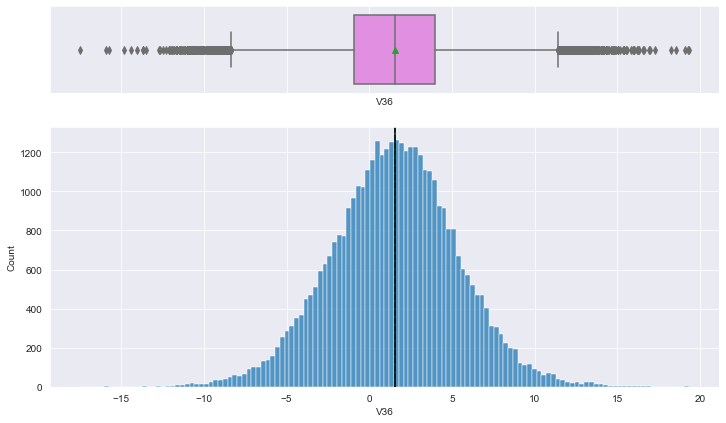

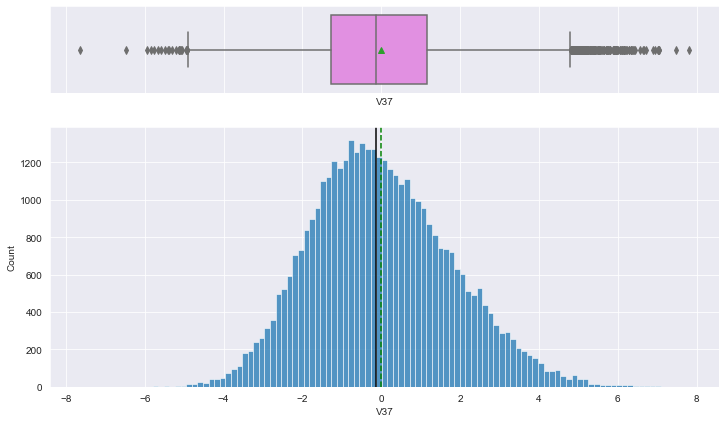

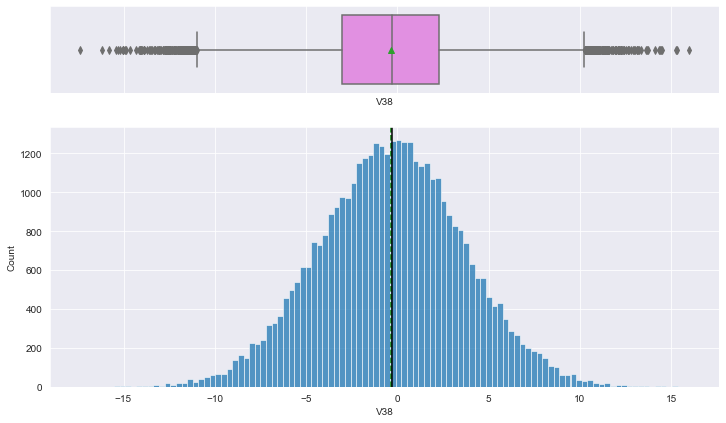

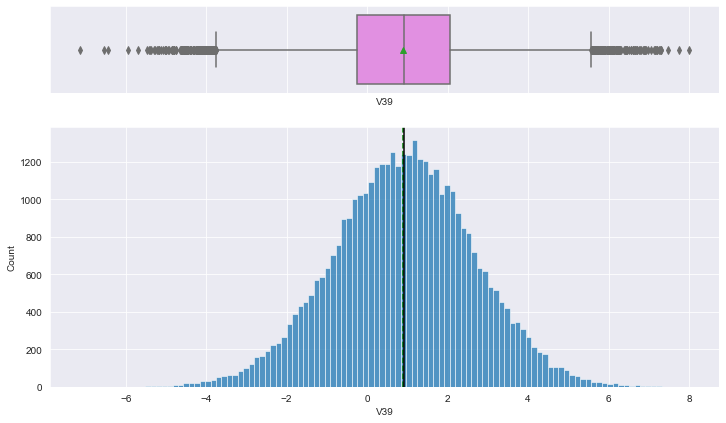

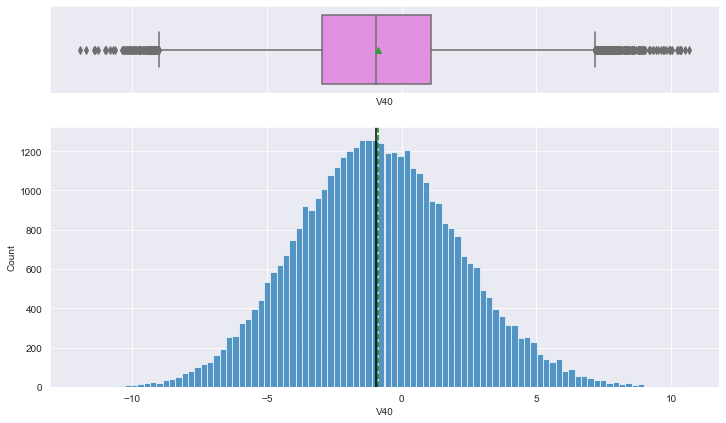

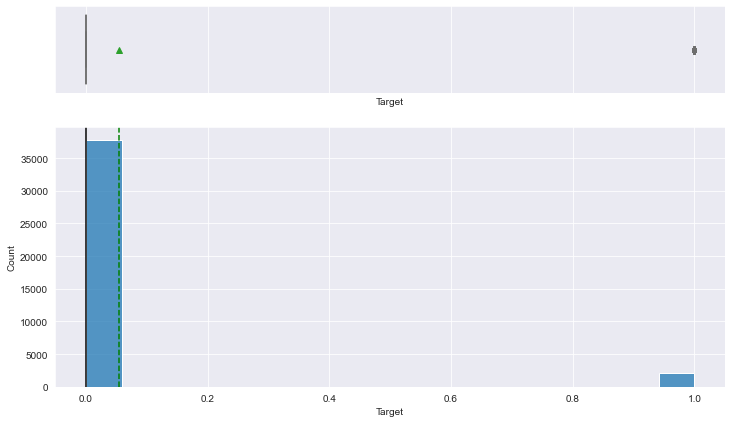

In [15]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None)

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

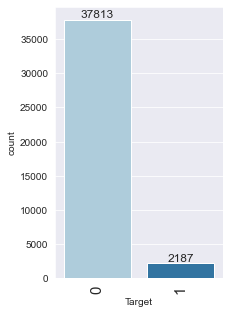

In [17]:
# Observations on Target
labeled_barplot(data, "Target")

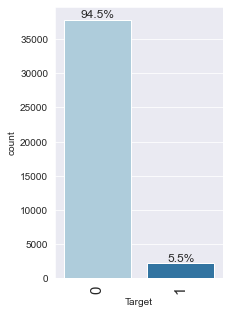

In [18]:
# Observations on Target as a percentage
labeled_barplot(data, "Target", perc = True)

### Univariate Observations
* The Target is highly imbalanced with 94.5% (37,813) of wind turbines not having a failure (0) and 5.5% (2,187) of wind turbines having a failure (1).
* All sensor (V1-V40) columns have outliers on both sides of the boxplots
* V1 looks similar to a normal distribution, and the mean is greater than the median.
* V2 looks to be close to a normal distribution, and the mean and median look to be almost equal.
* V3 looks to be close to a normal distribution, and the mean is greater than the median.
* V4 looks to be close to a normal distribution, and the mean is a little greater than the median.
* V5 looks to be close to a normal distribution, and the mean is a little greater than the median.
* V6 looks close to a normal distribution, and the mean and median look to be equal.
* V7 looks close to a normal distribution, and the mean is a little greater than the median.
* V8 looks similar to a normal distribution, and the mean is a less than the median.
* V9 looks close to a normal distribution, and the mean is a little greater than the median.
* V10 looks similar to a normal distribution, and the mean is a less than the median.
* V11 looks close to a normal distribution, and the mean and median look to be equal.
* V12 looks close to a normal distribution, and the mean is a little greater than the median.
* V13 looks close to a normal distribution, and the mean and median look to be almost equal.
* V14 looks close to a normal distribution, and the mean is a little greater than the median.
* V15 looks close to a normal distribution, and the mean and median look to be almost equal.
* V16 looks similar to a normal distribution, and the mean is a less than the median.
* V17 looks similar to a normal distribution, and the mean is a little less than the median.
* V18 looks similar to a normal distribution, and the mean is greater than the median.
* V19 looks to be close to a normal distribution, and the mean is a little less than the median.
* V20 looks to be close to a normal distribution, and the mean and median look to be equal.
* V21 looks to be close to a normal distribution, and the mean is a little less than the median.
* V22 looks similar to a normal distribution, and the mean and median look to be almost equal.
* V23 looks close to a normal distribution, and the mean is a little less than the median.
* V24 looks close to a normal distribution, and the mean is a little greater than the median.
* V25 looks close to a normal distribution, and the mean and median look to be equal.
* V26 looks close to a normal distribution, and the mean and median look to be equal.
* V27 looks similar to a normal distribution, and the mean is greater than the median.
* V28 looks close to a normal distribution, and the mean is a little greater than the median.
* V29 looks close to a normal distribution, and the mean is greater than the median.
* V30 looks similar to a normal distribution, and the mean is less than the median.
* V31 looks close to a normal distribution, and the mean is a little greater than the median.
* V32 looks close to a normal distribution, and the mean is a little greater than the median.
* V33 looks close to a normal distribution, and the mean is a little greater than the median.
* V34 looks similar to a normal distribution, and the mean is less than the median.
* V35 looks close to a normal distribution, and the mean is a little greater than the median.
* V36 looks close to a normal distribution, and the mean and median look to be equal.
* V37 looks similar to a normal distribution, and the mean is greater than the median.
* V38 looks close to a normal distribution, and the mean and median look to be equal.
* V39 looks close to a normal distribution, and the mean and median look to be equal.
* V40 looks close to a normal distribution, and the mean is a little greater than the median.

### Bivariate Analysis

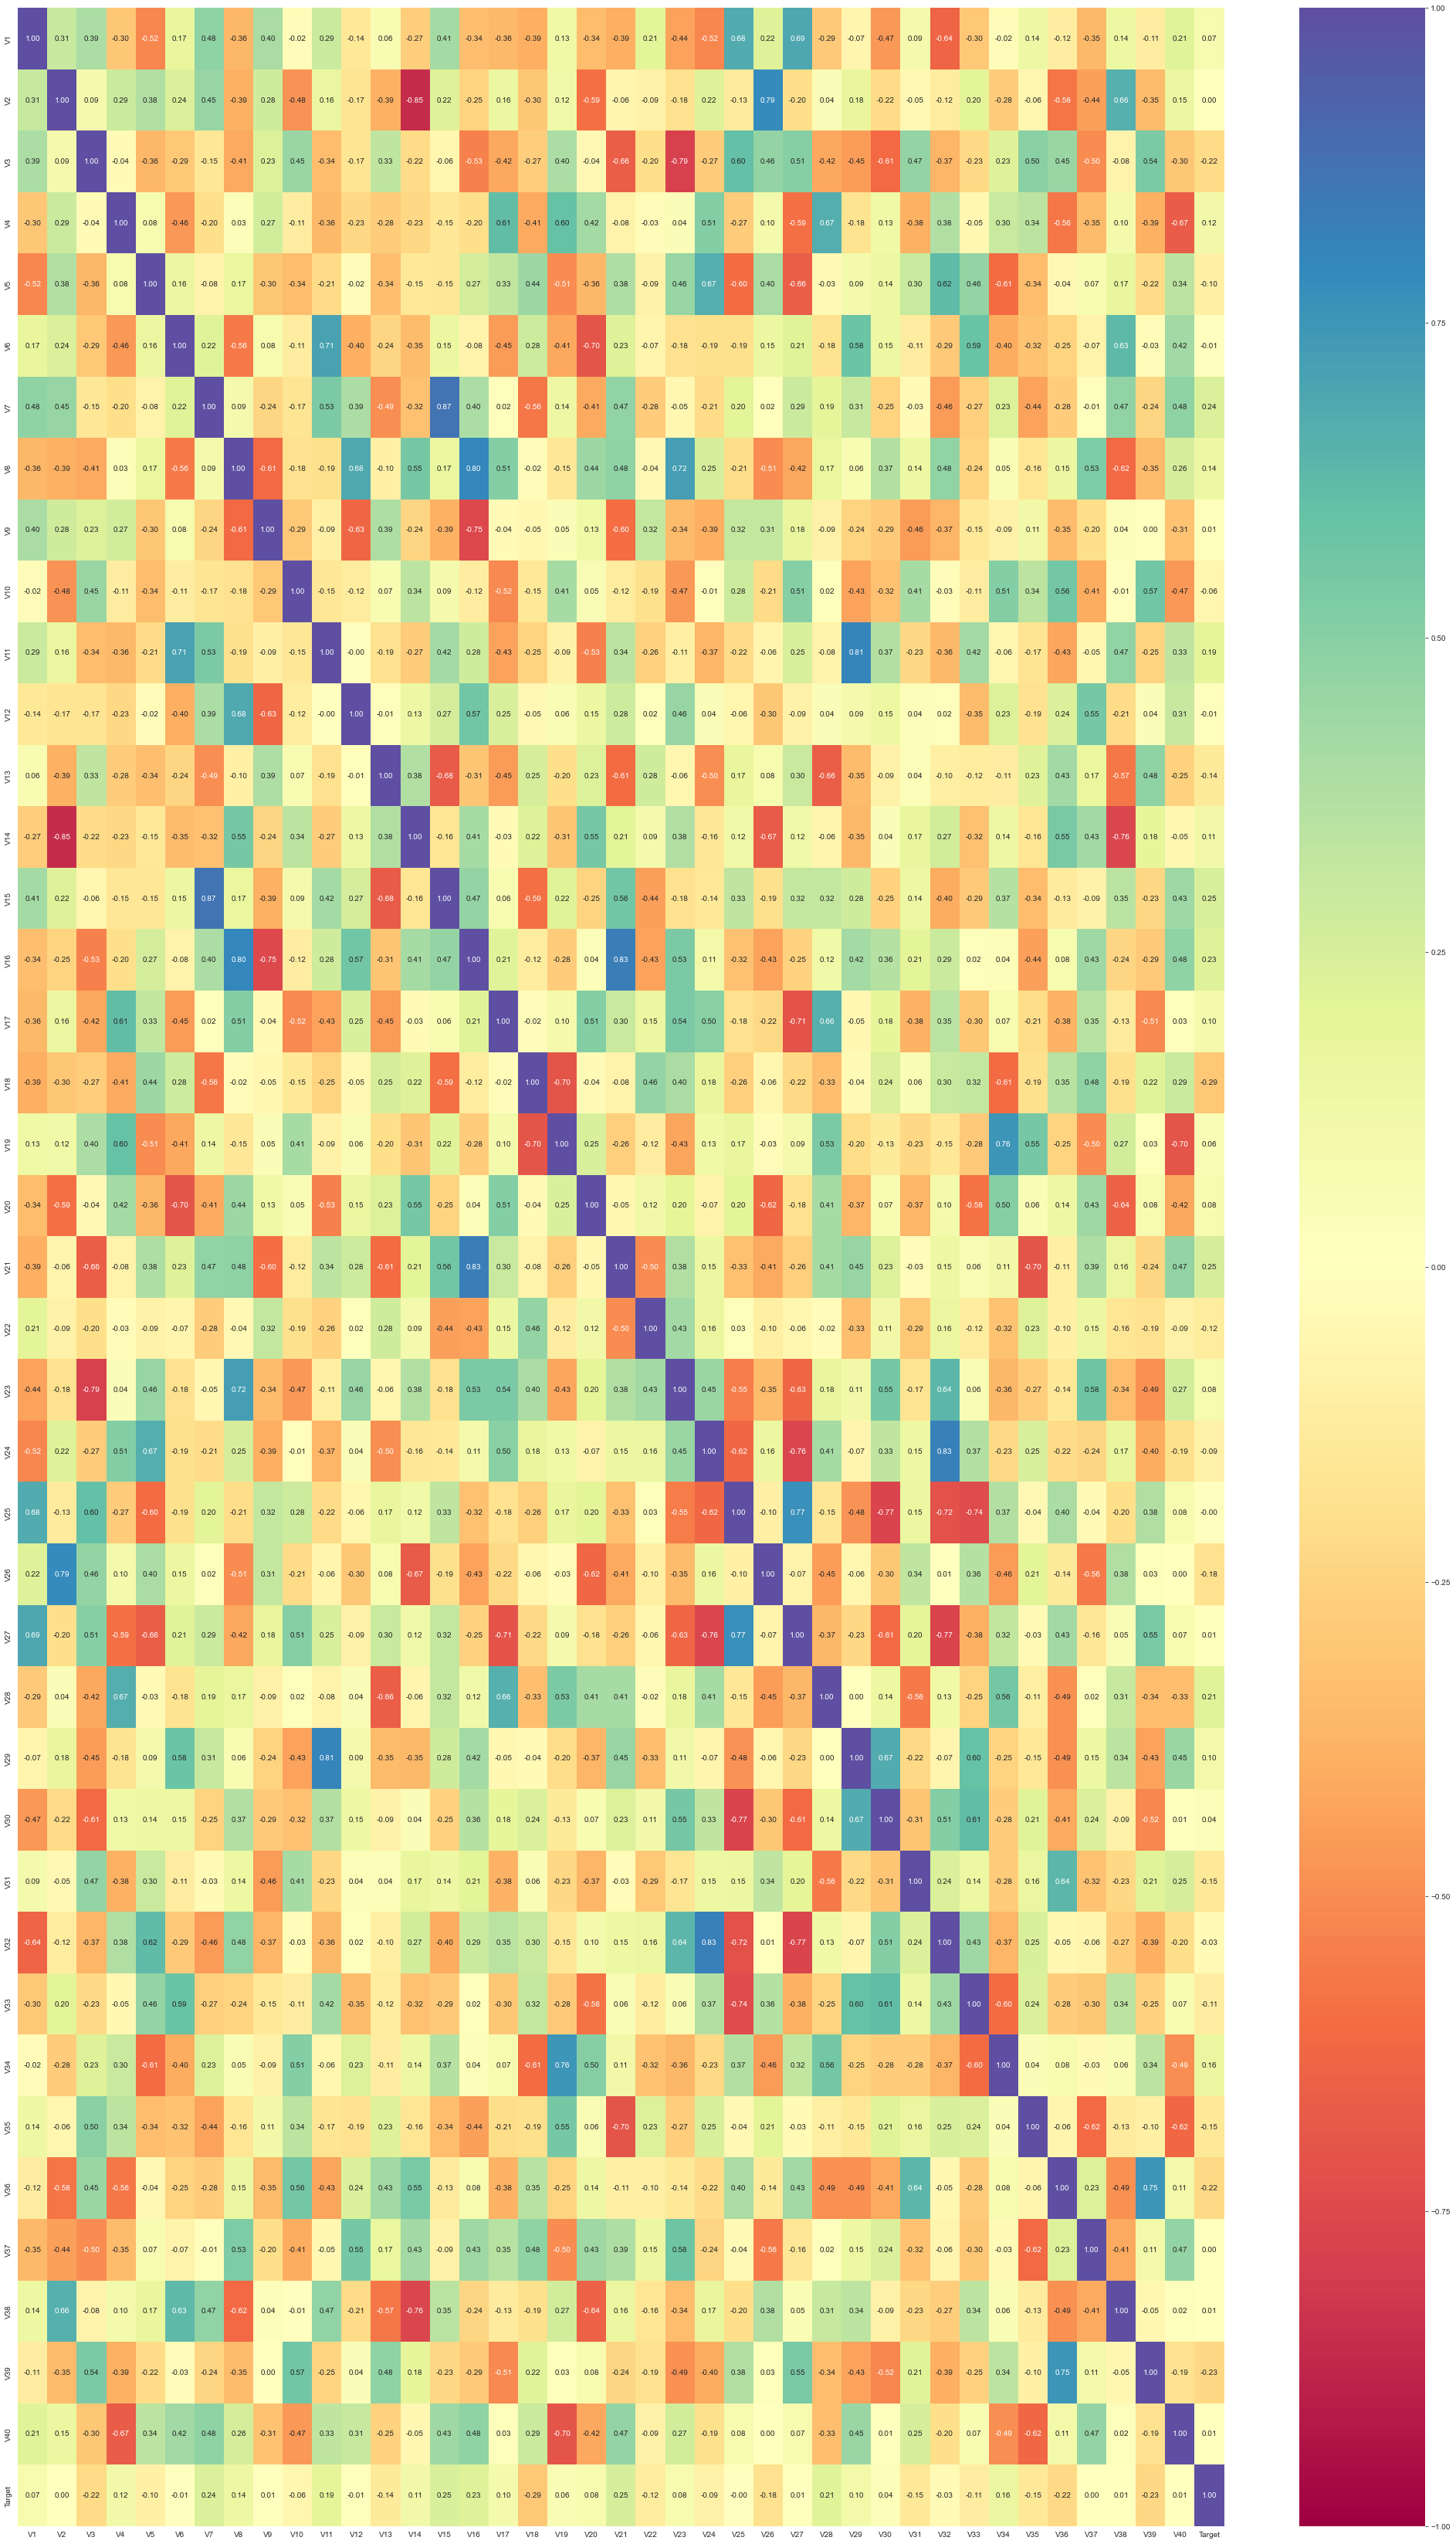

In [19]:
# Correlation heatmap for all numerical variables
plt.figure(figsize = (35, 60))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()

In [20]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize = (12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target = " + str(target_uniq[0]))
    sns.histplot(
        data = data[data[target] == target_uniq[0]],
        x = predictor,
        kde = True,
        ax = axs[0, 0],
        color = "teal",
        stat = "density",
    )

    axs[0, 1].set_title("Distribution of target for target = " + str(target_uniq[1]))
    sns.histplot(
        data = data[data[target] == target_uniq[1]],
        x = predictor,
        kde = True,
        ax = axs[0, 1],
        color = "orange",
        stat = "density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data = data, x = target, y = predictor, ax = axs[1, 0], palette = "gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data = data,
        x = target,
        y = predictor,
        ax = axs[1, 1],
        showfliers = False,
        palette = "gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

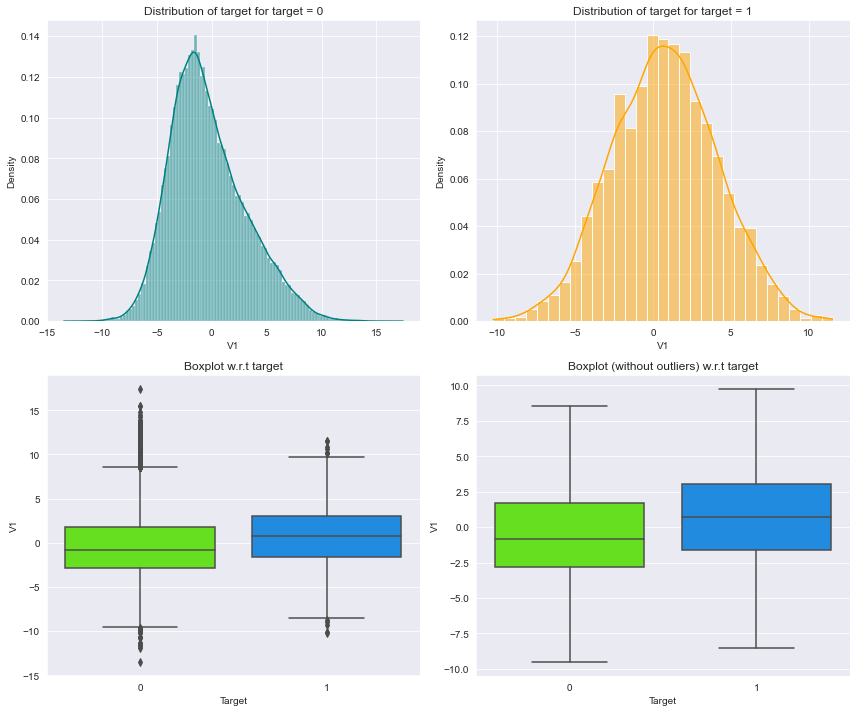

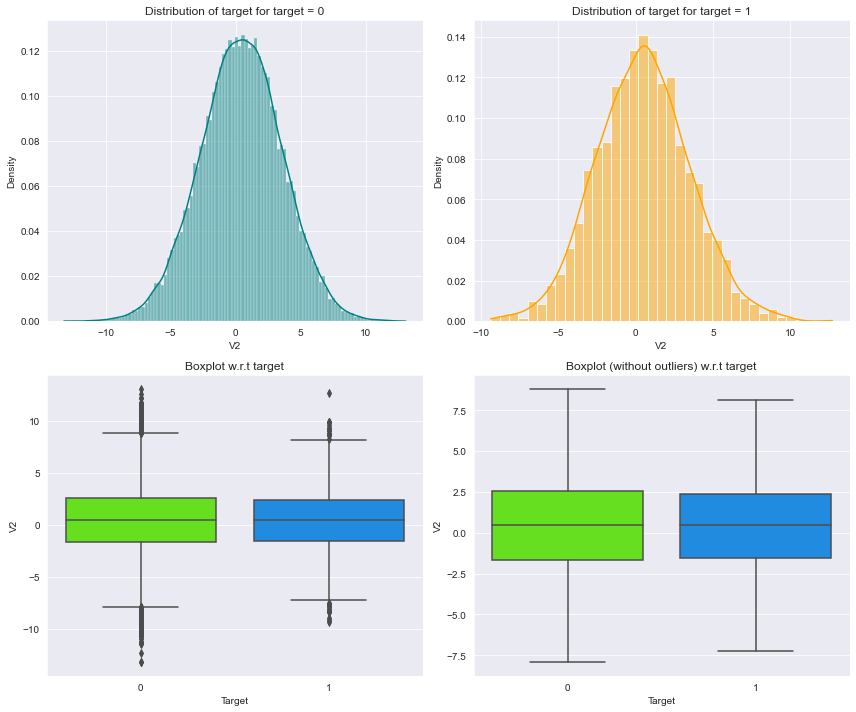

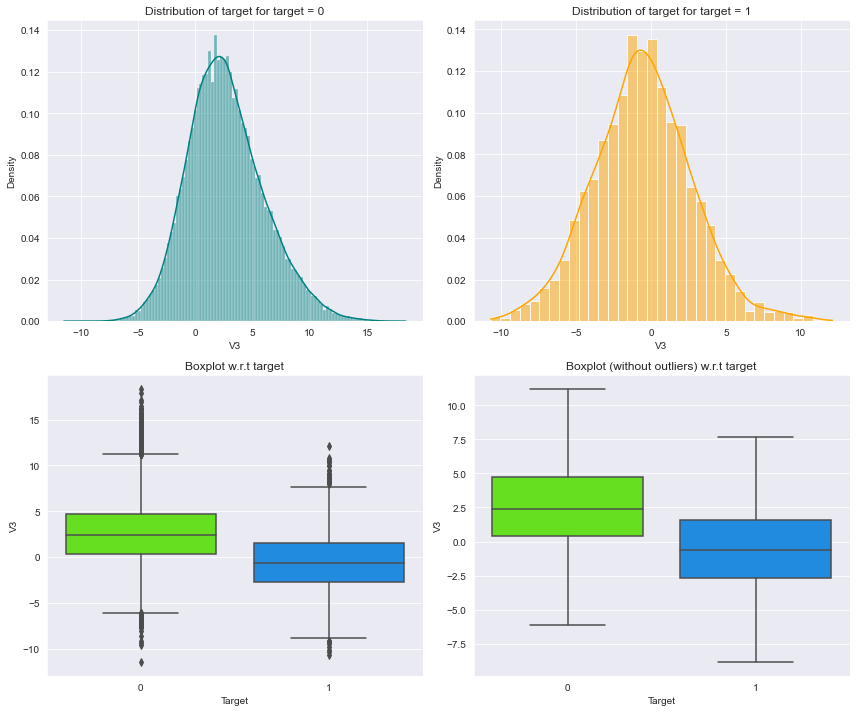

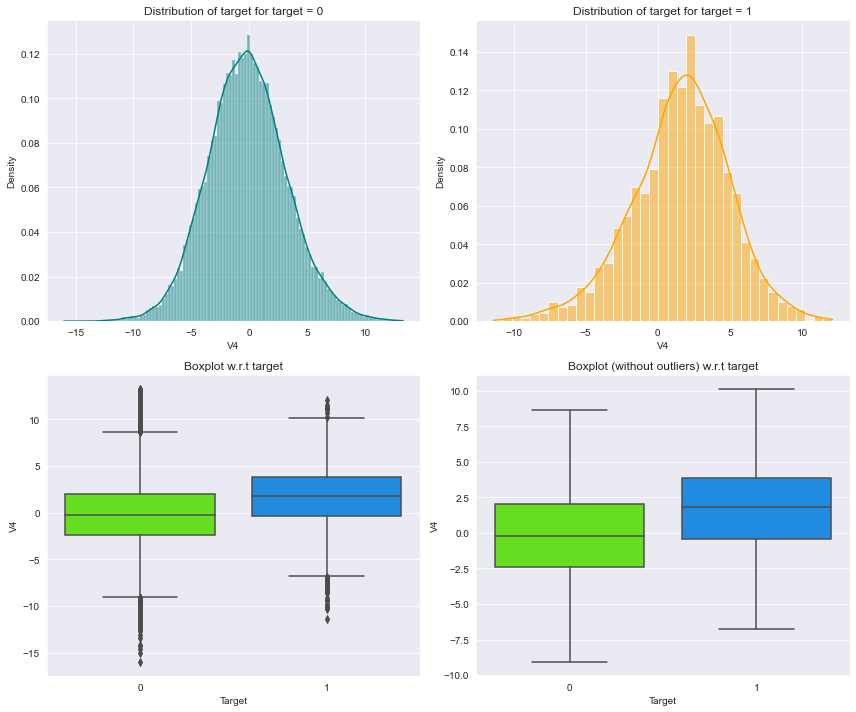

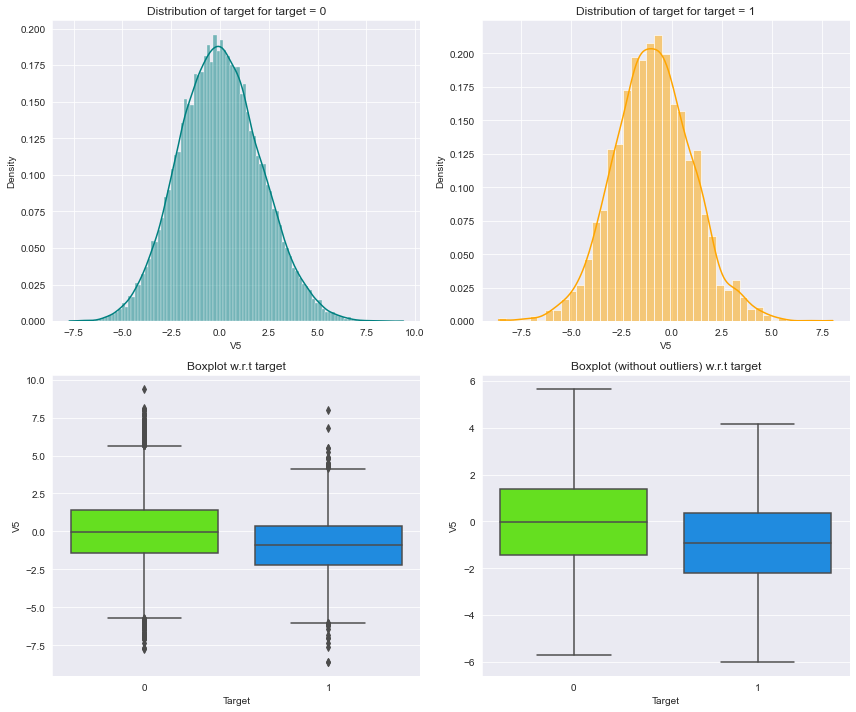

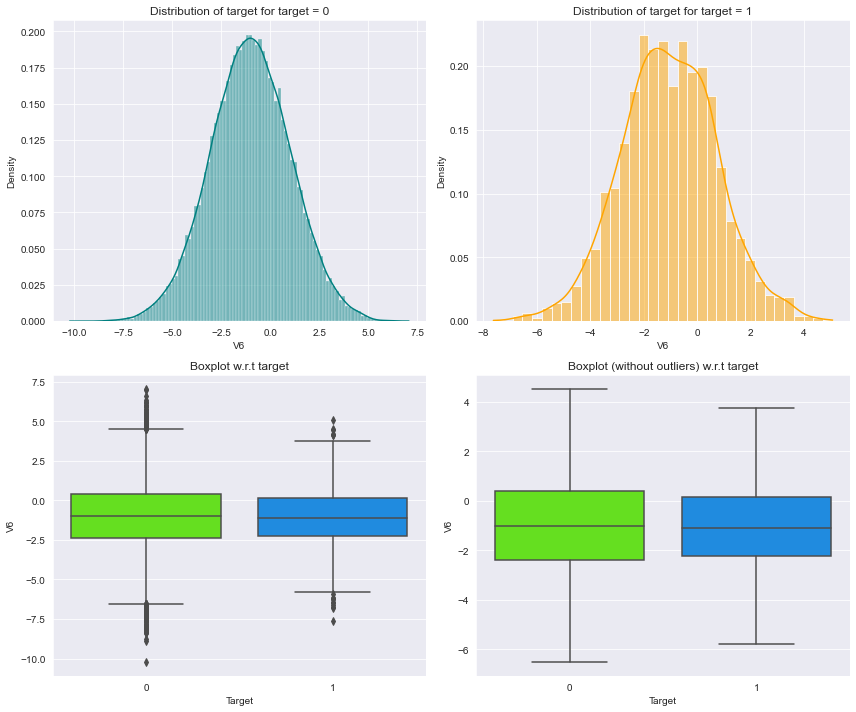

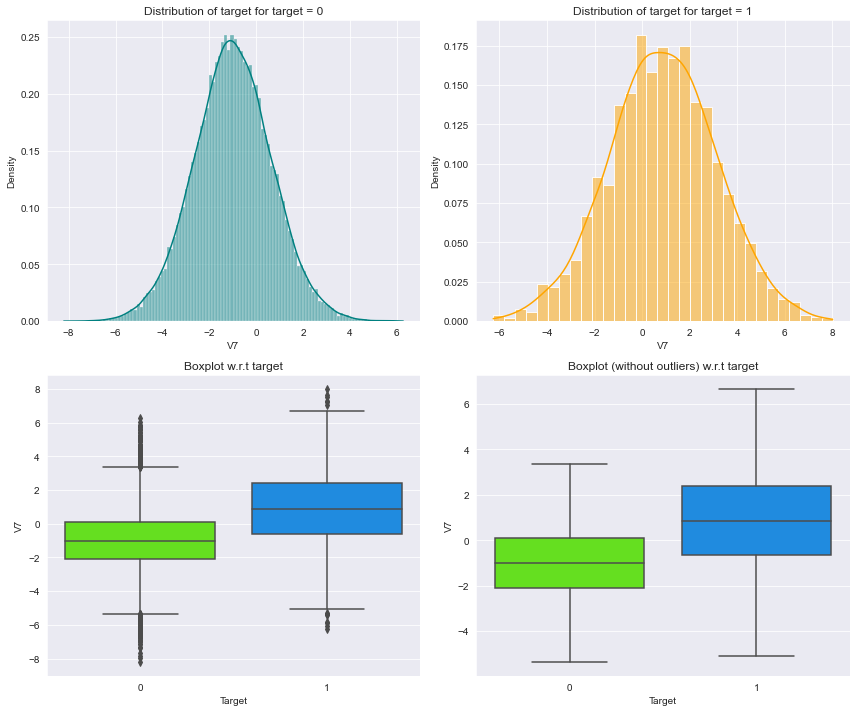

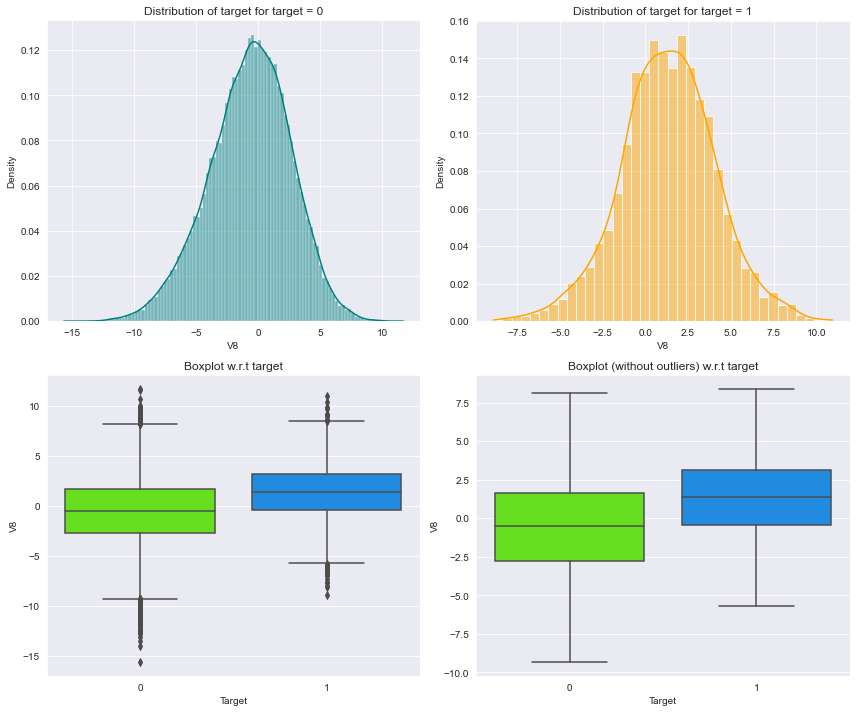

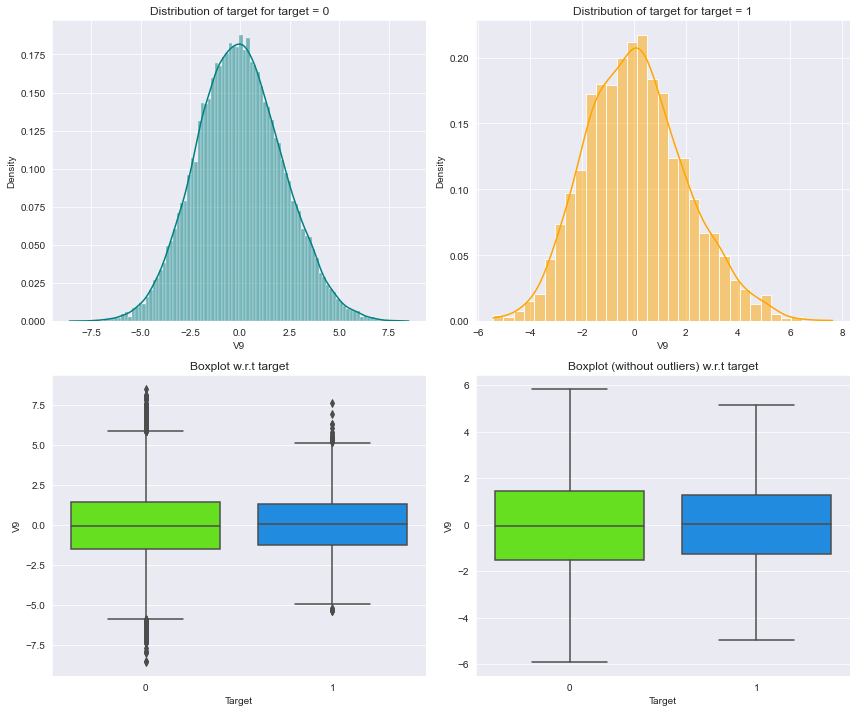

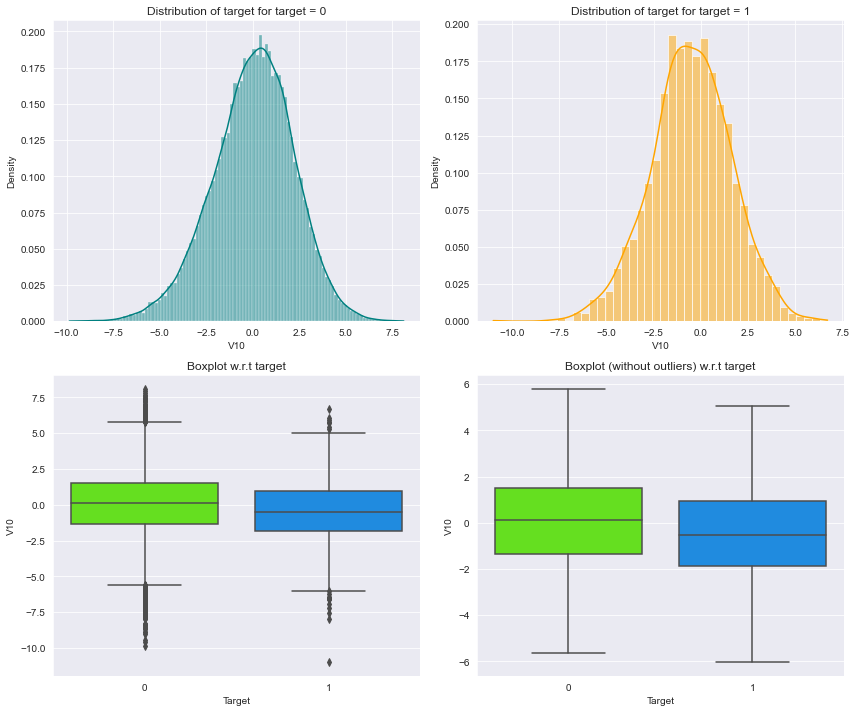

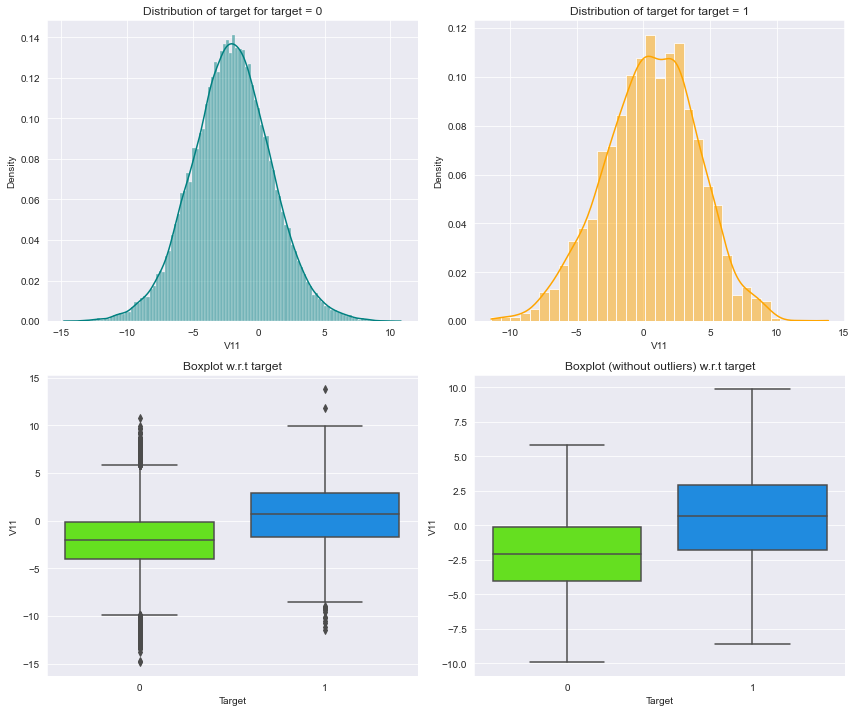

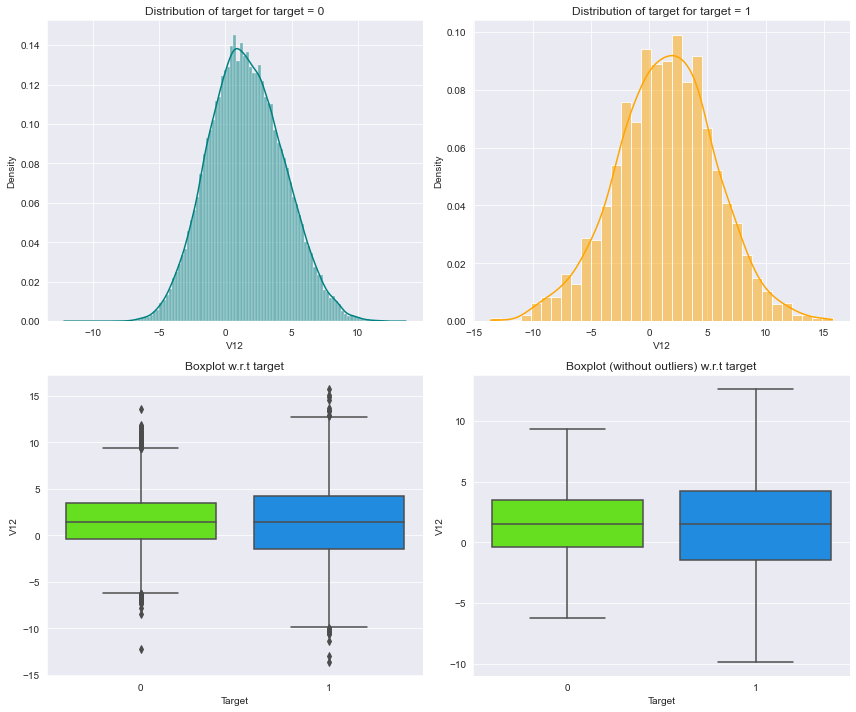

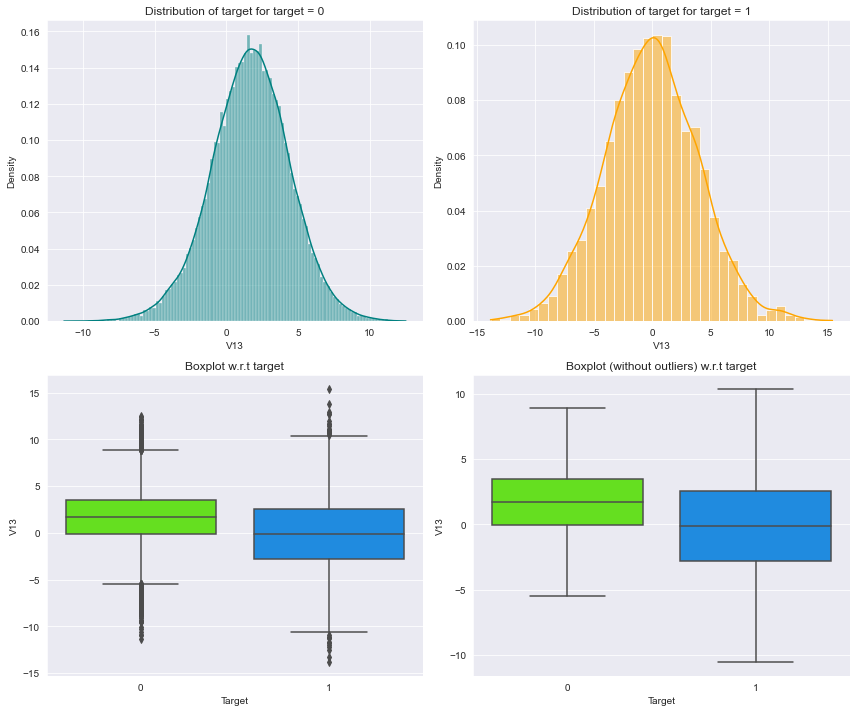

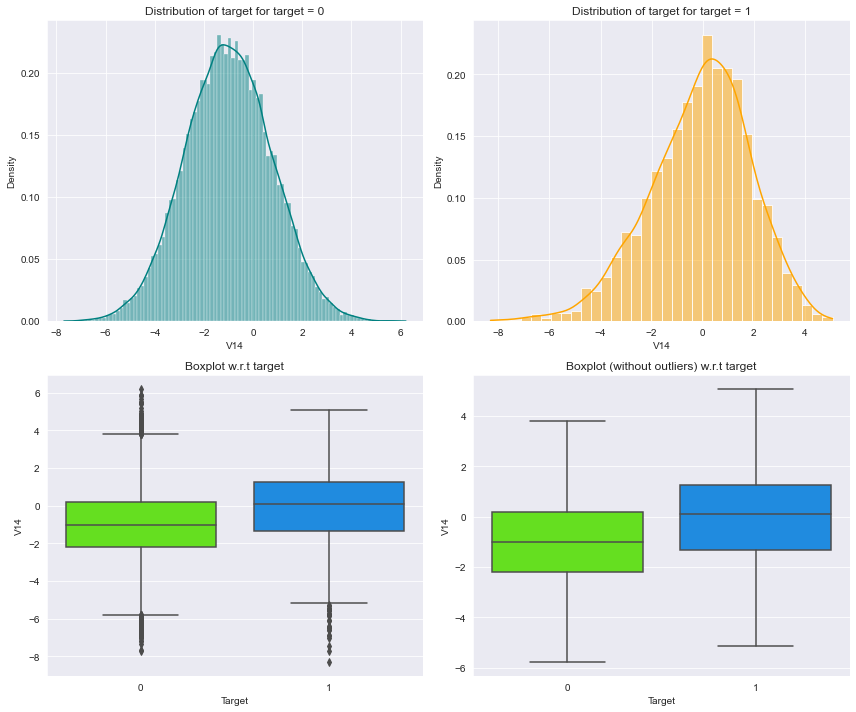

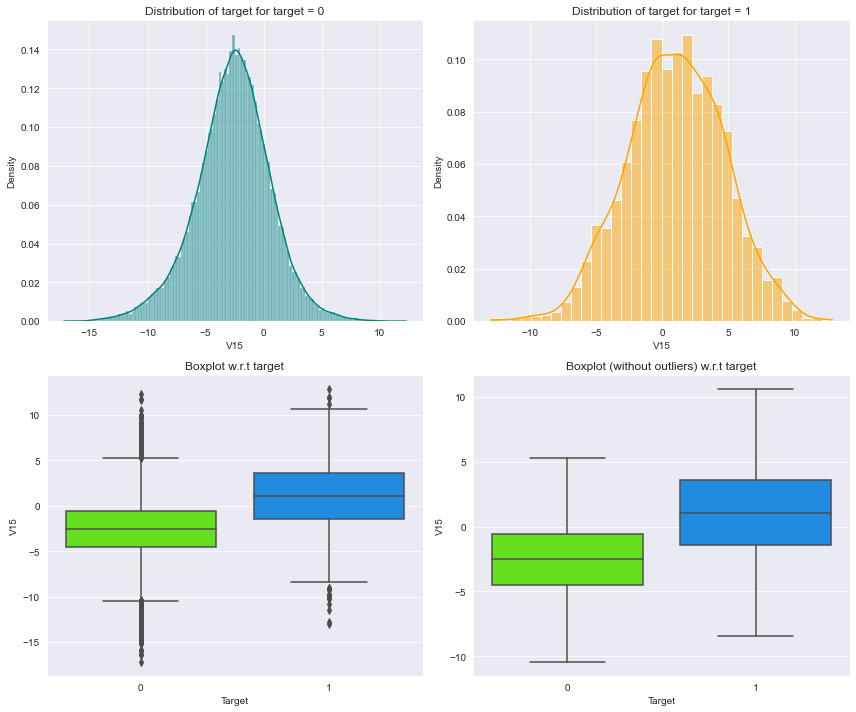

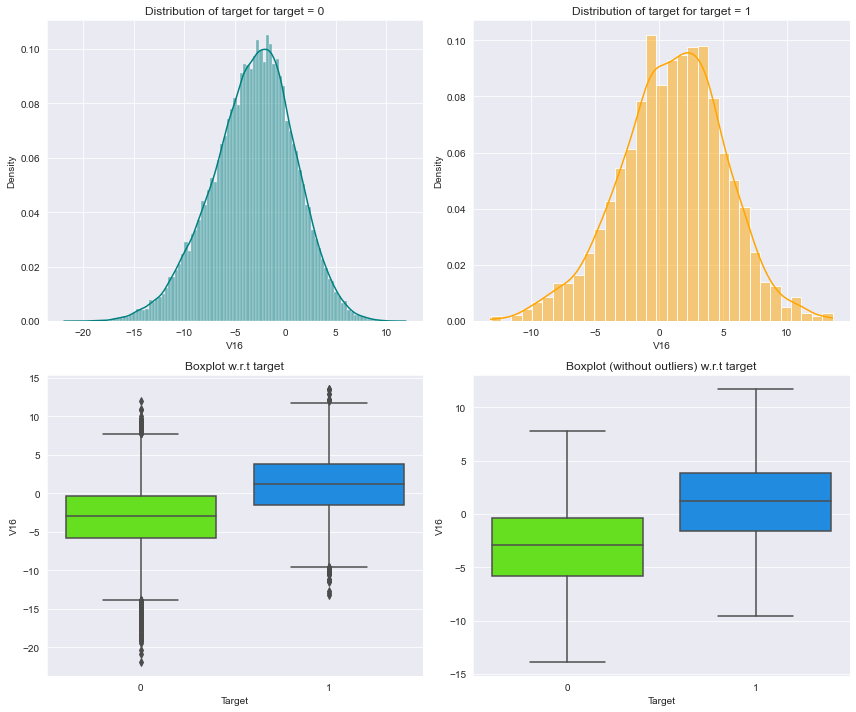

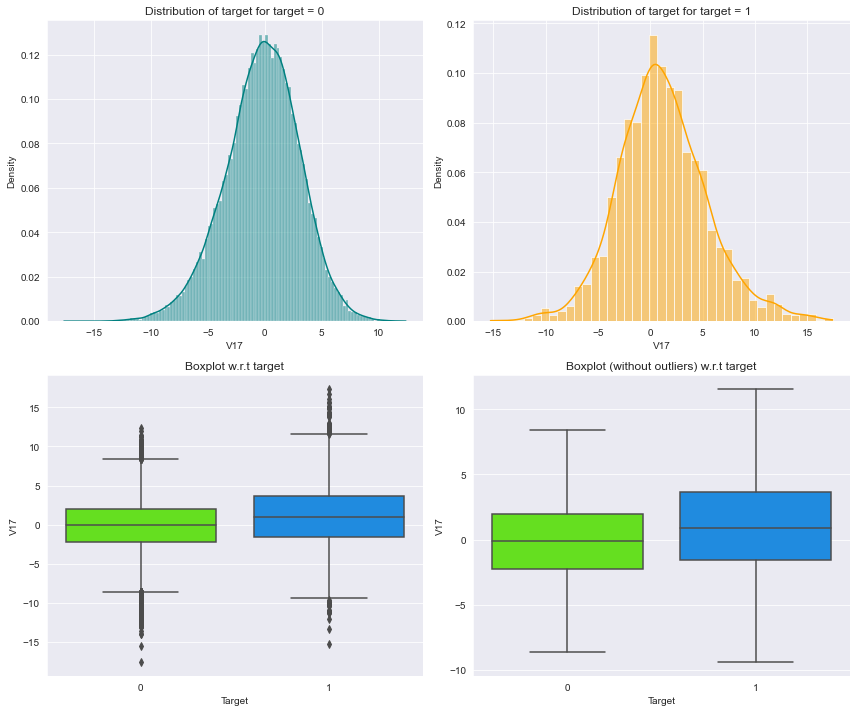

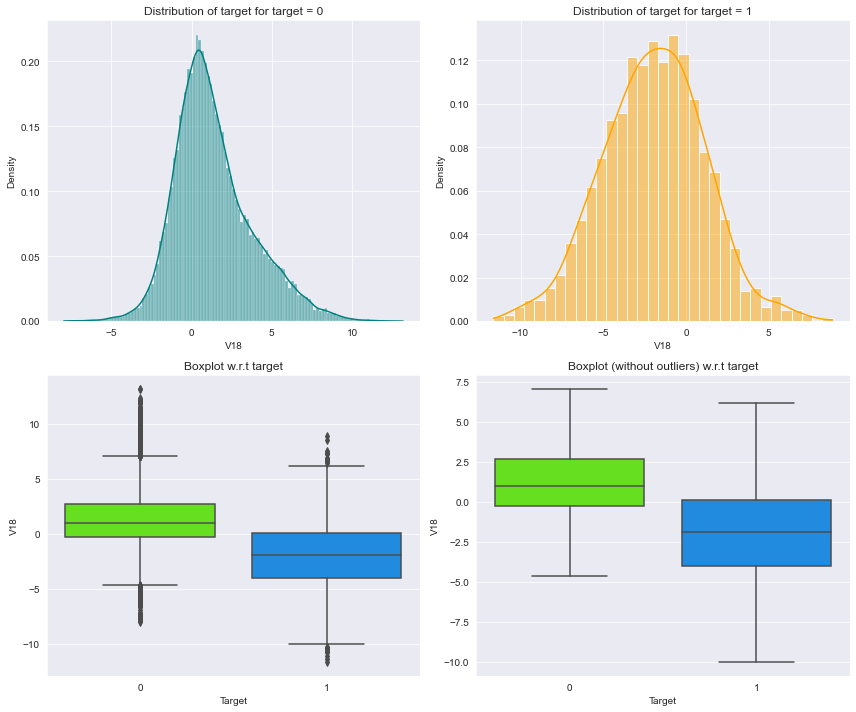

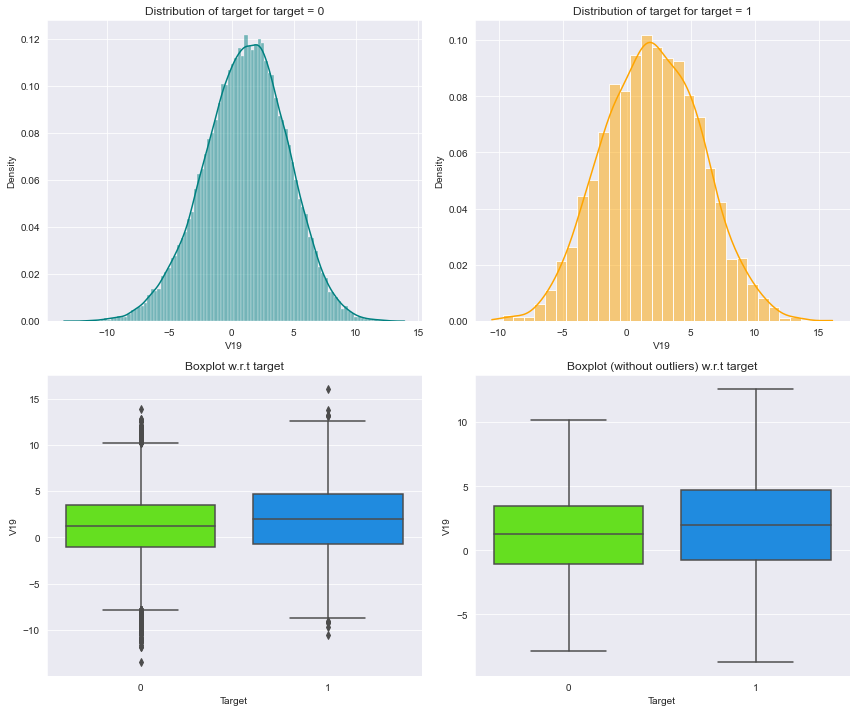

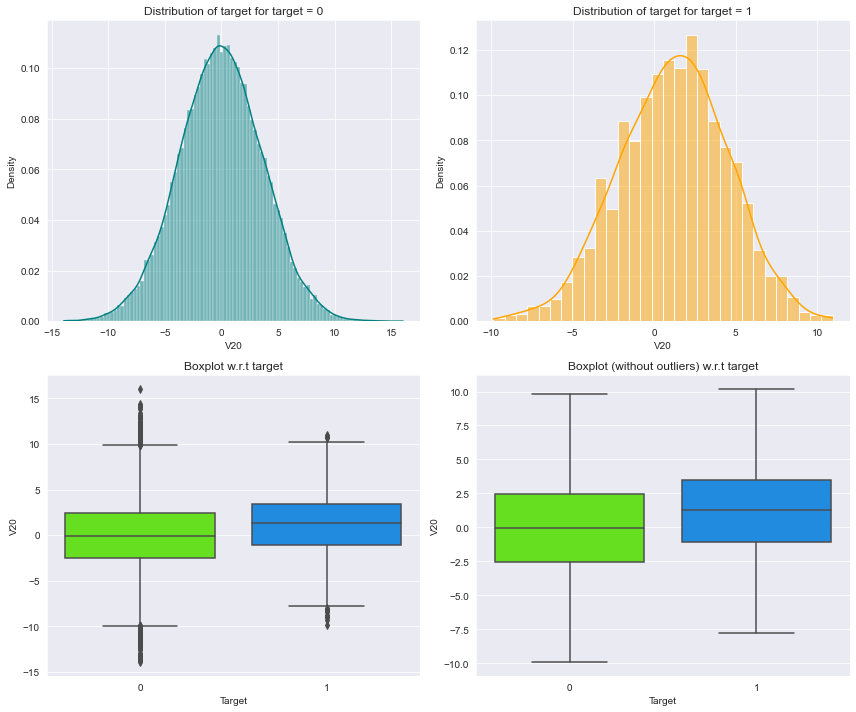

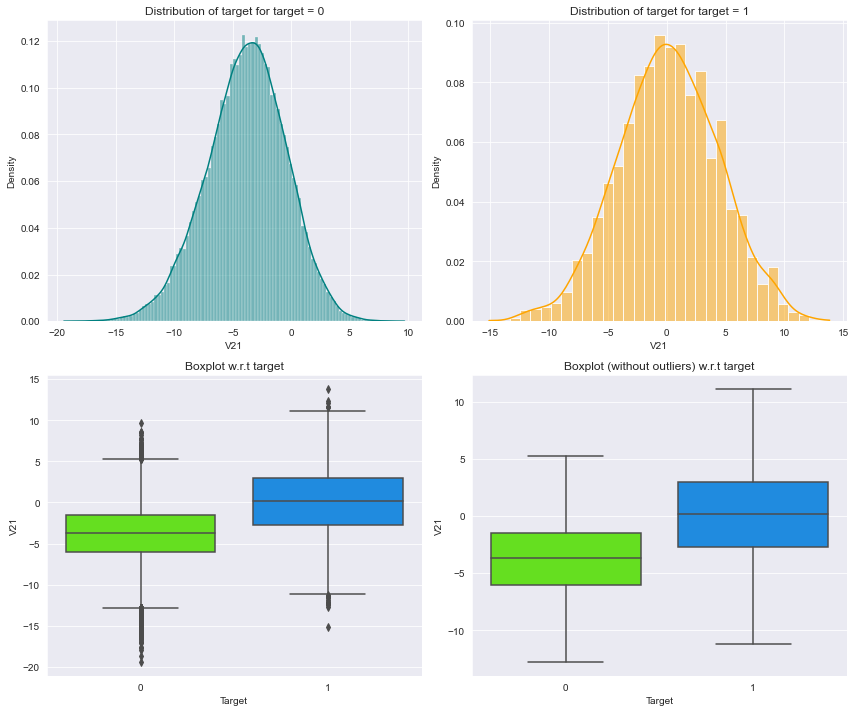

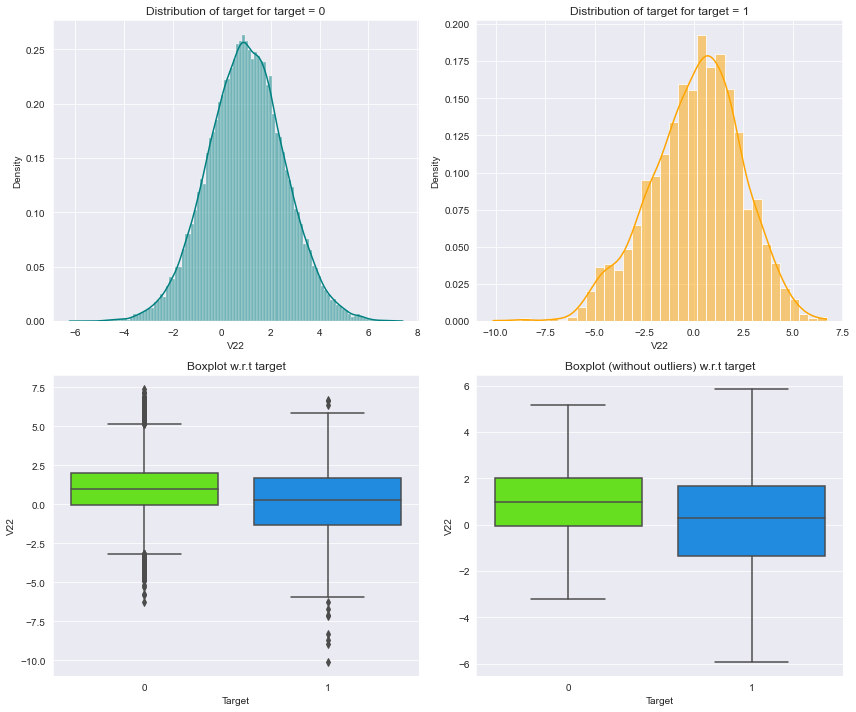

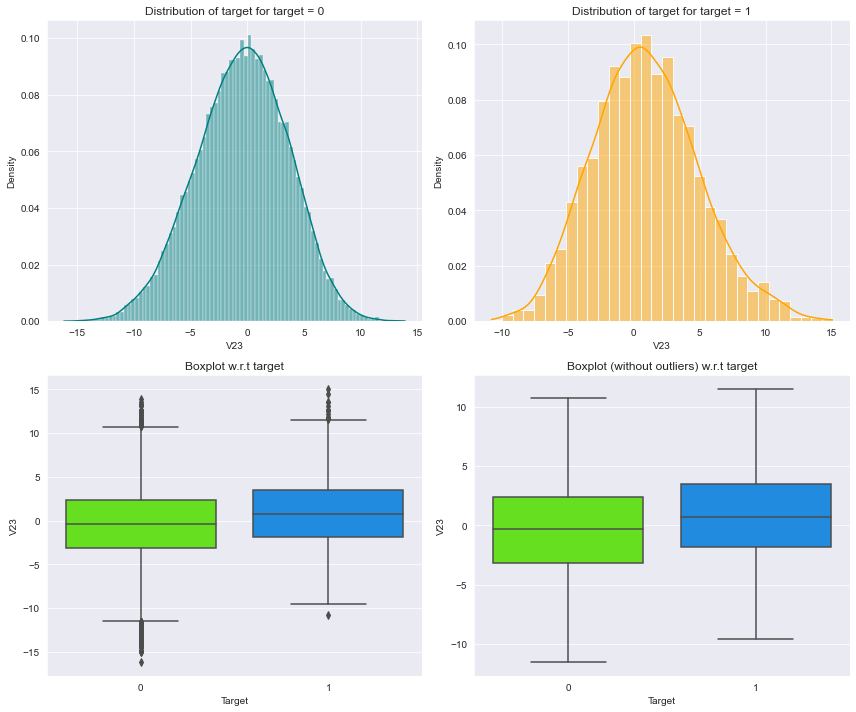

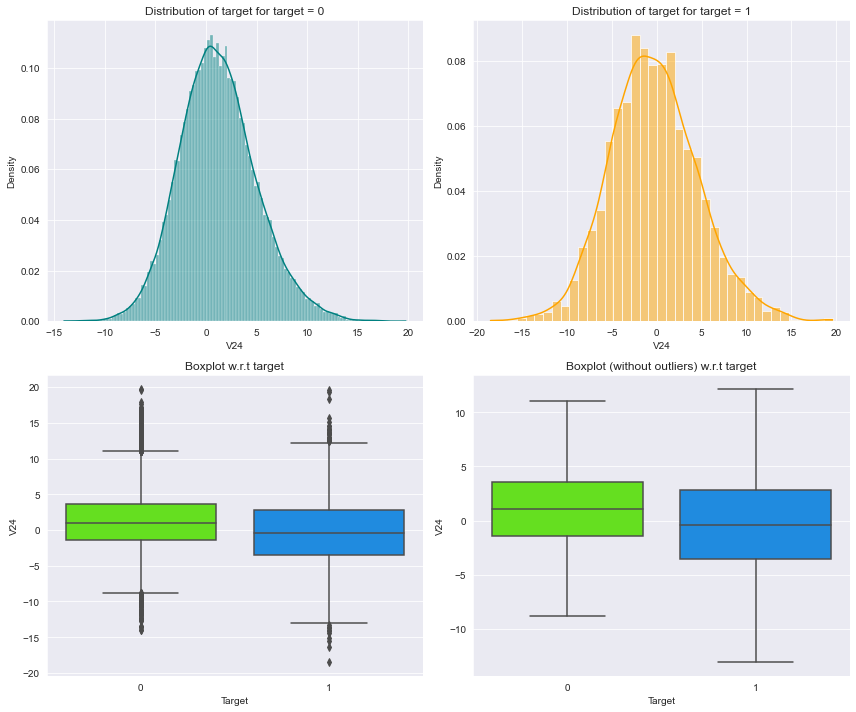

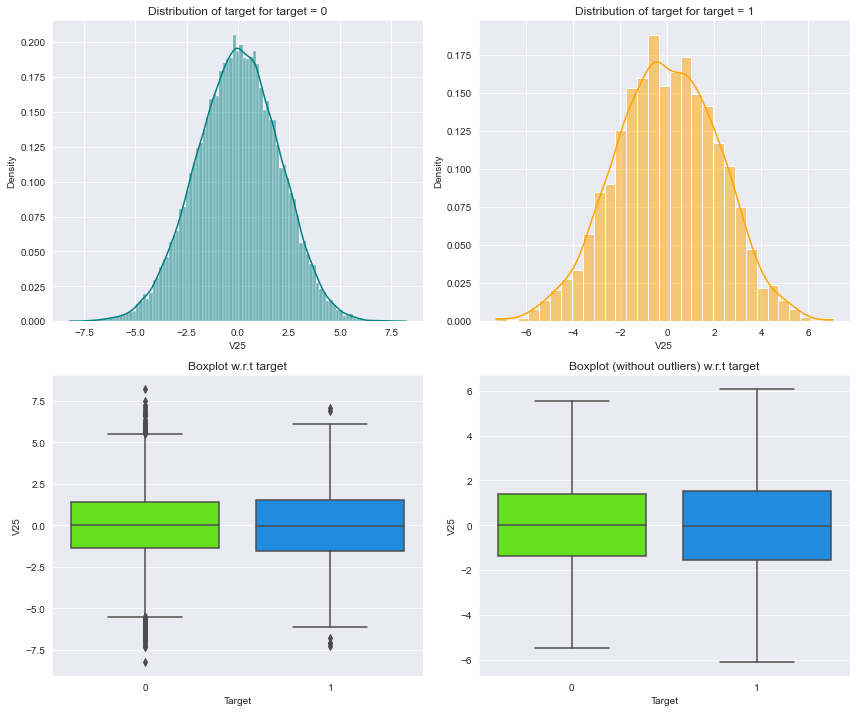

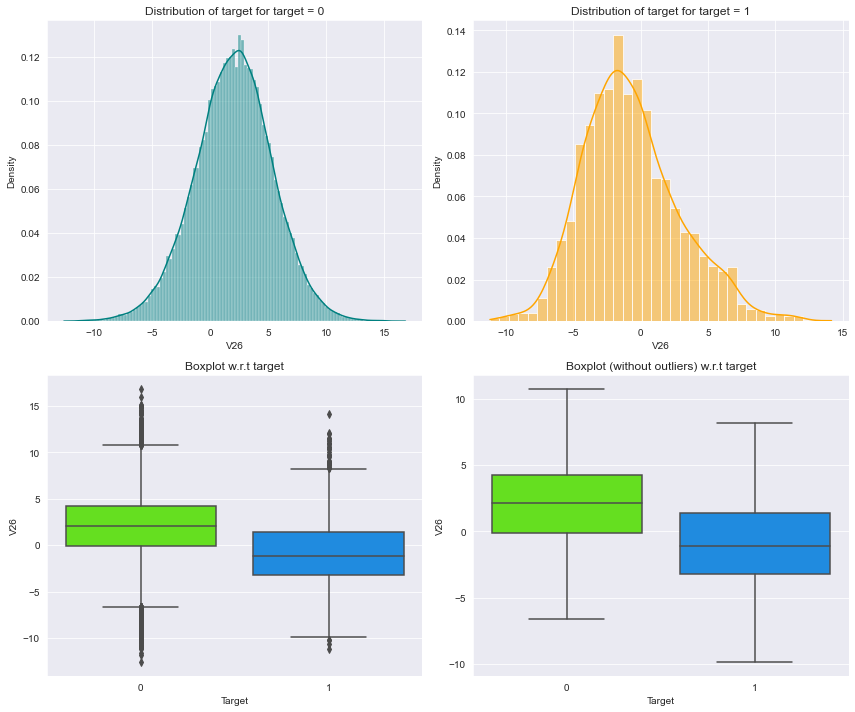

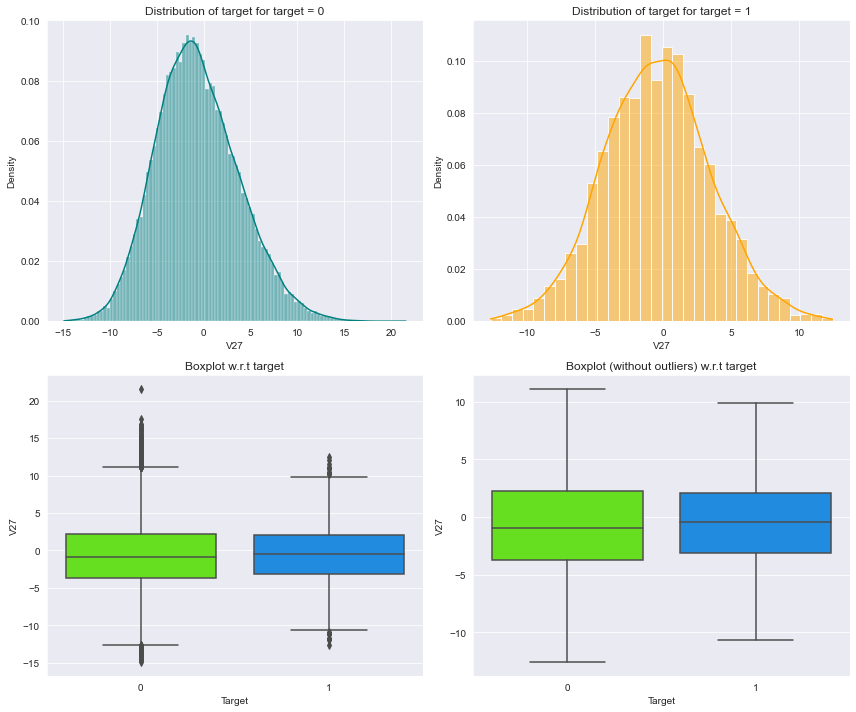

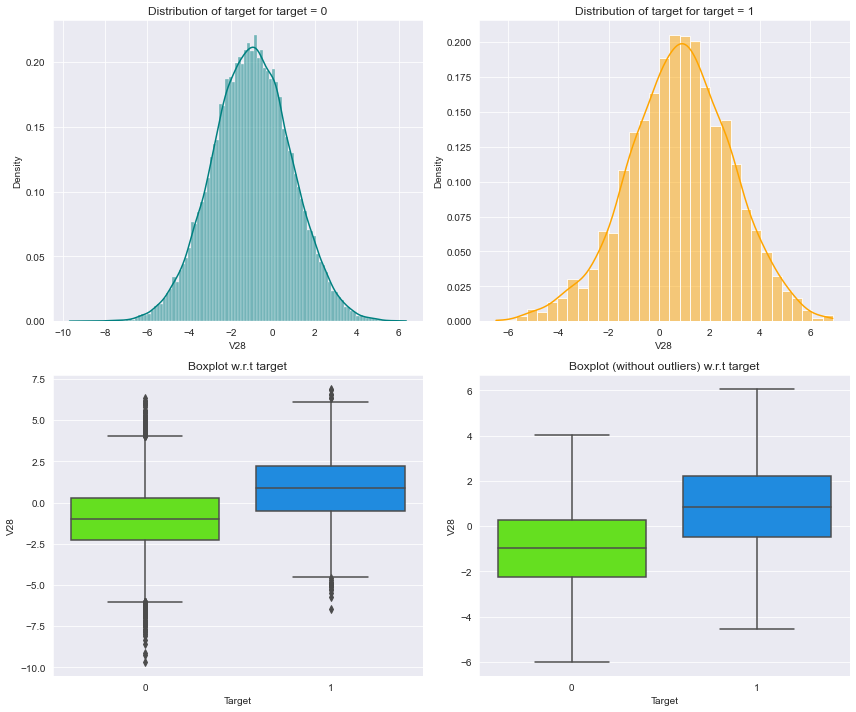

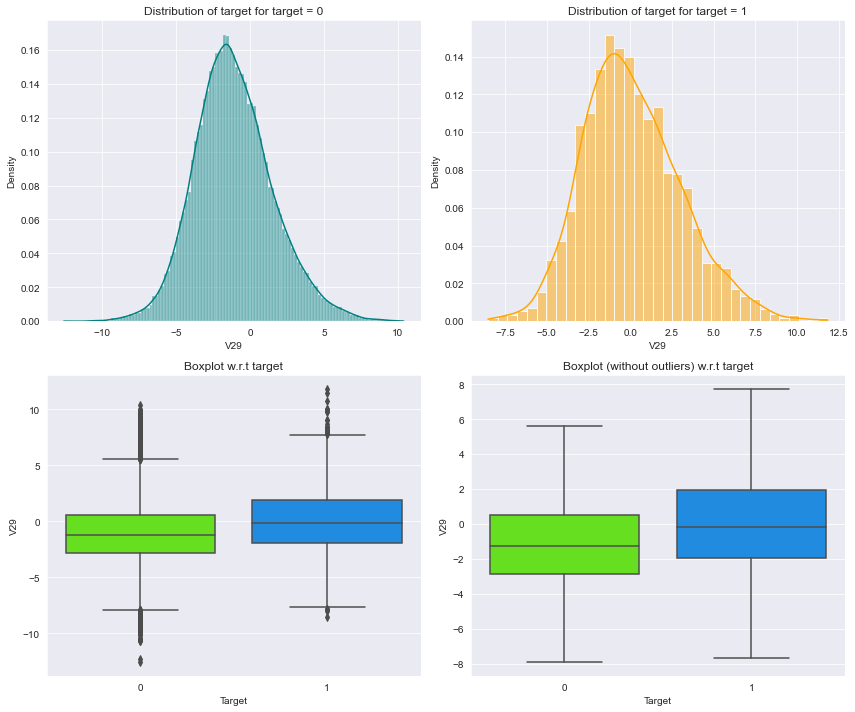

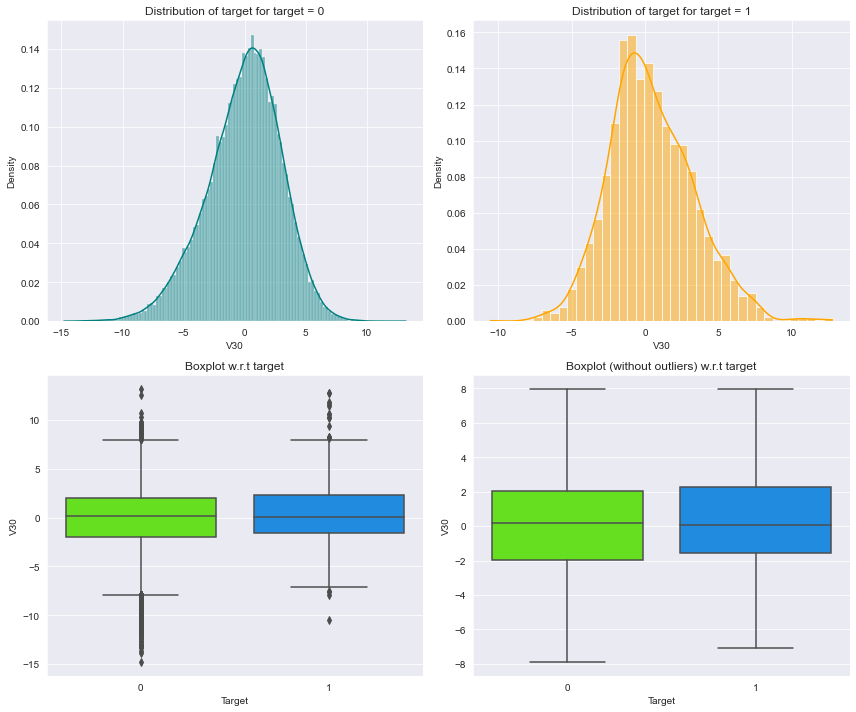

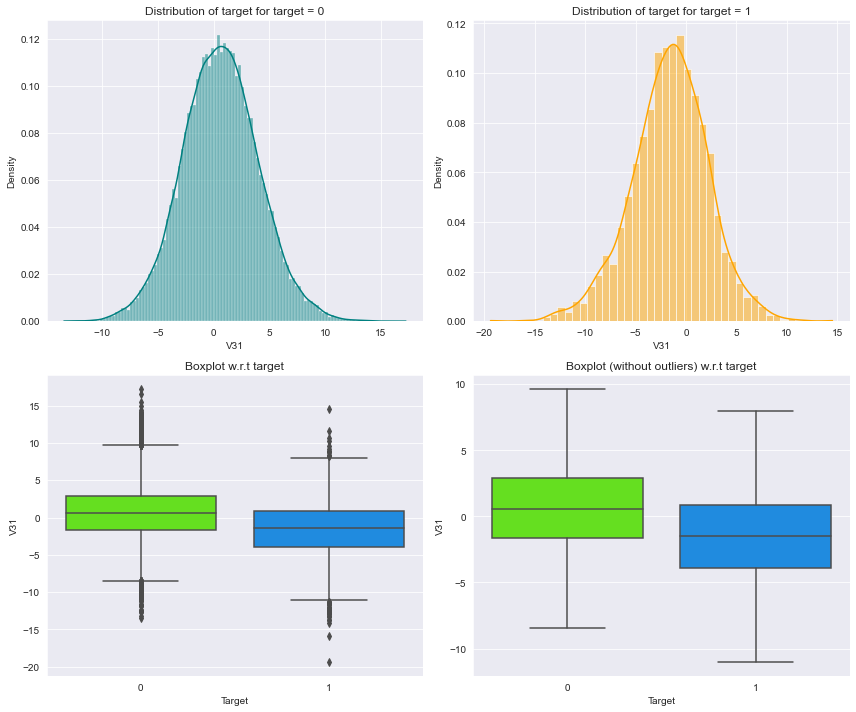

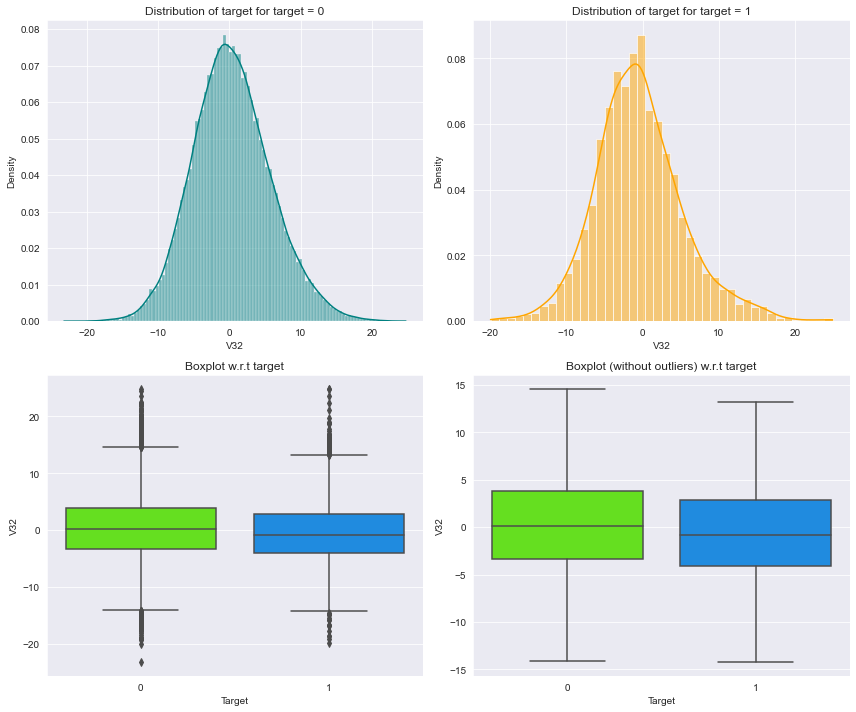

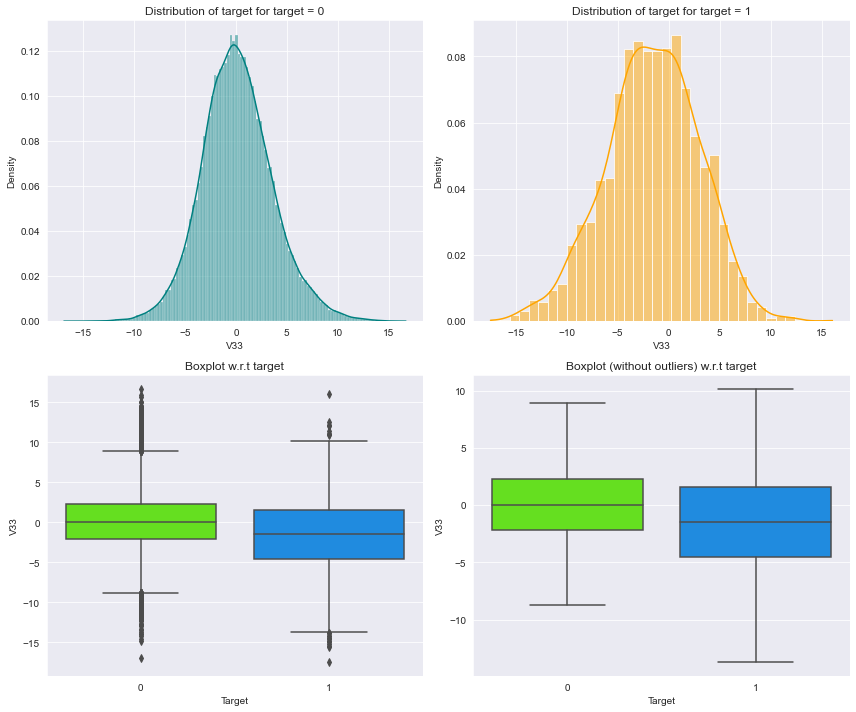

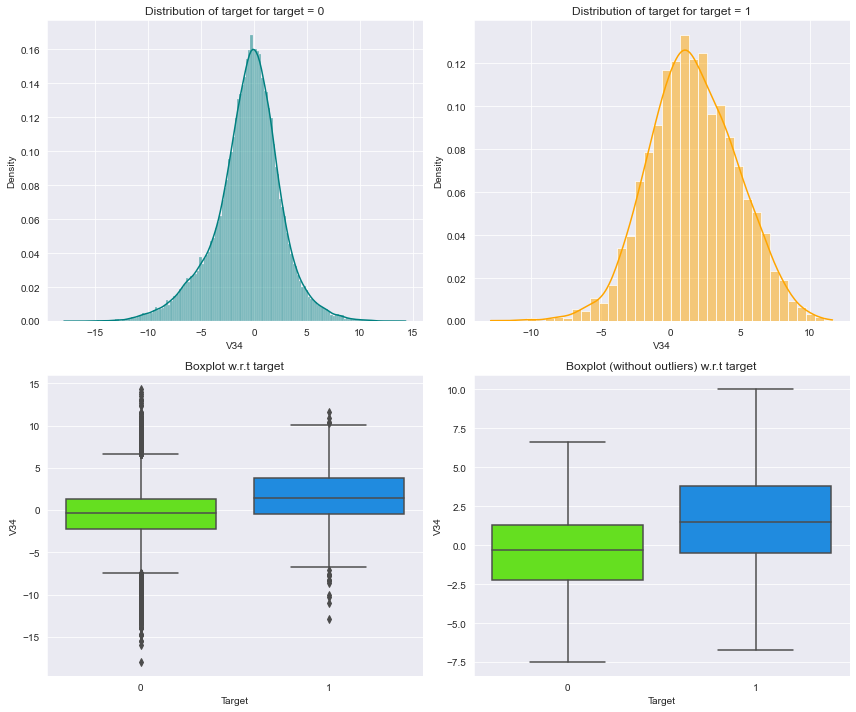

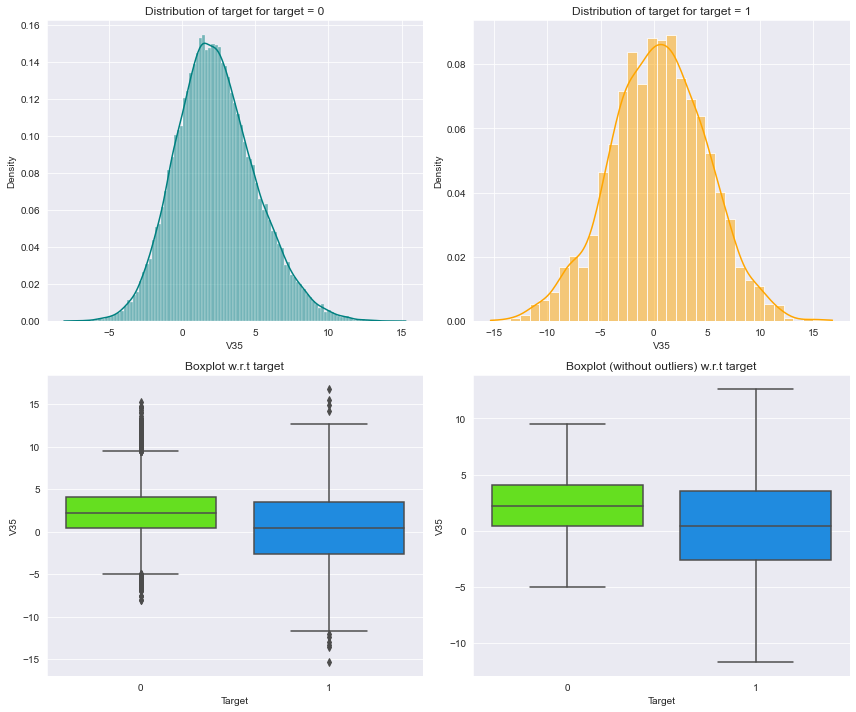

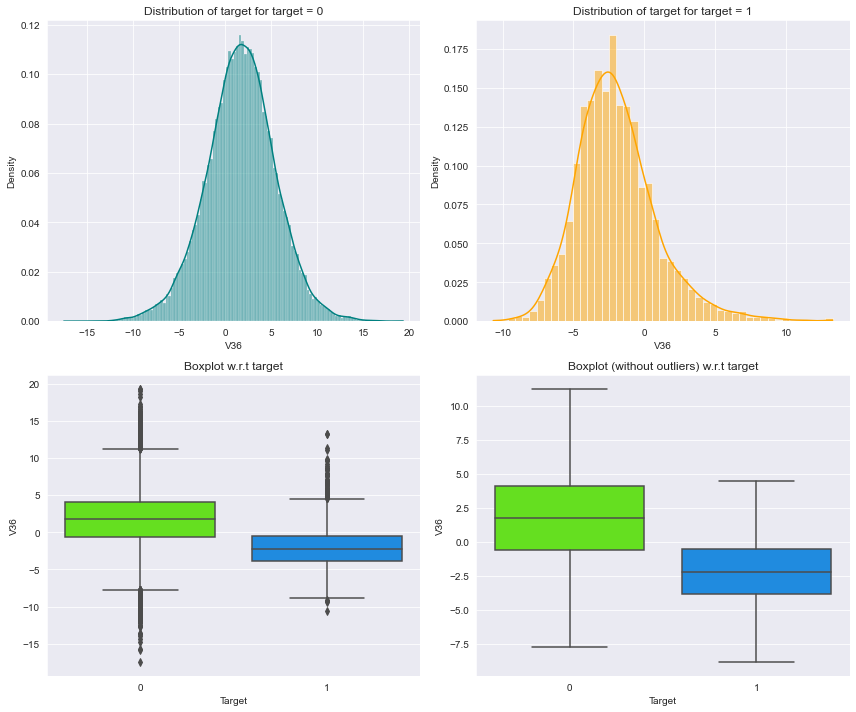

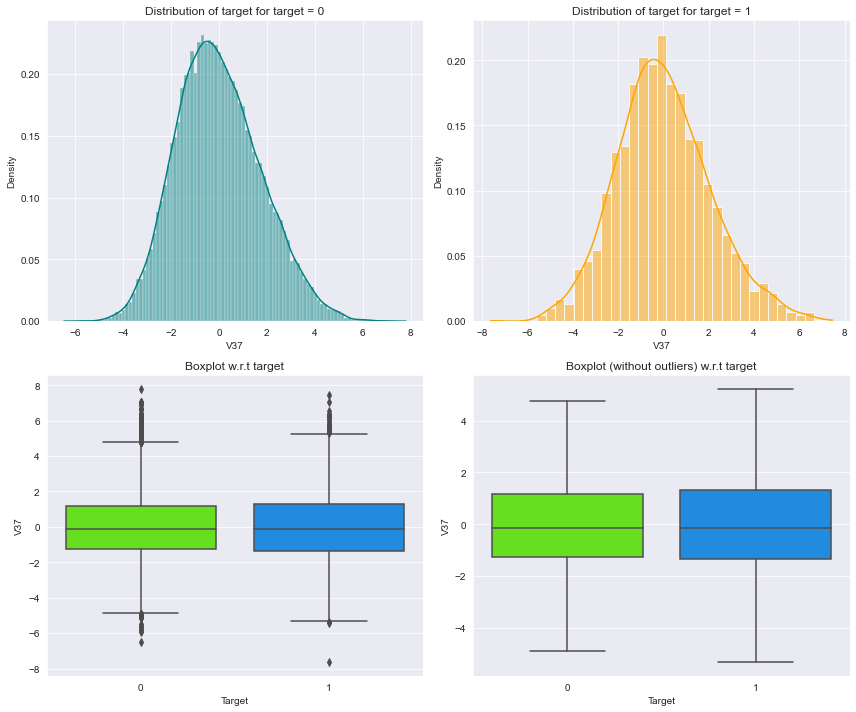

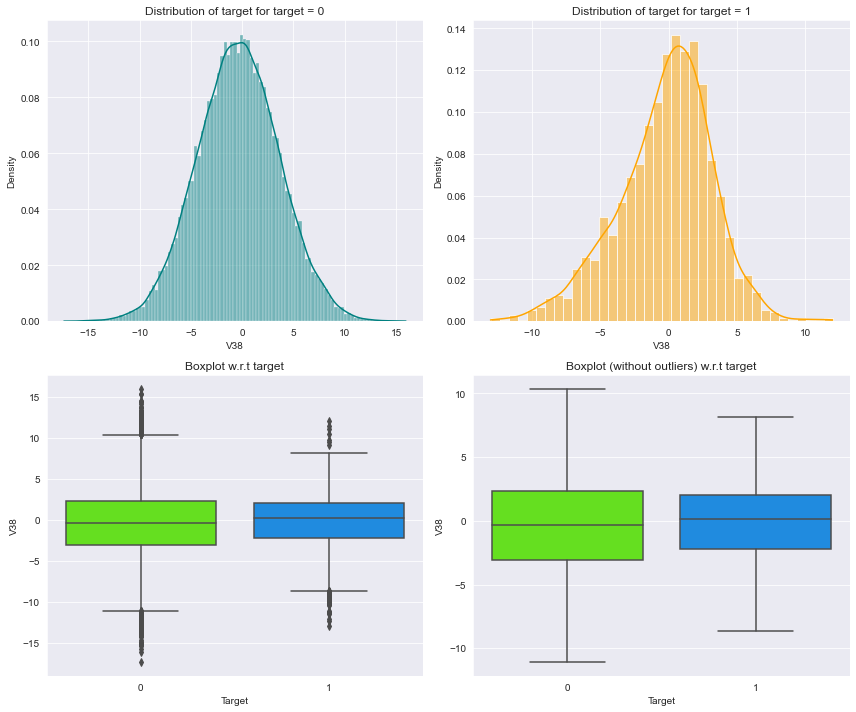

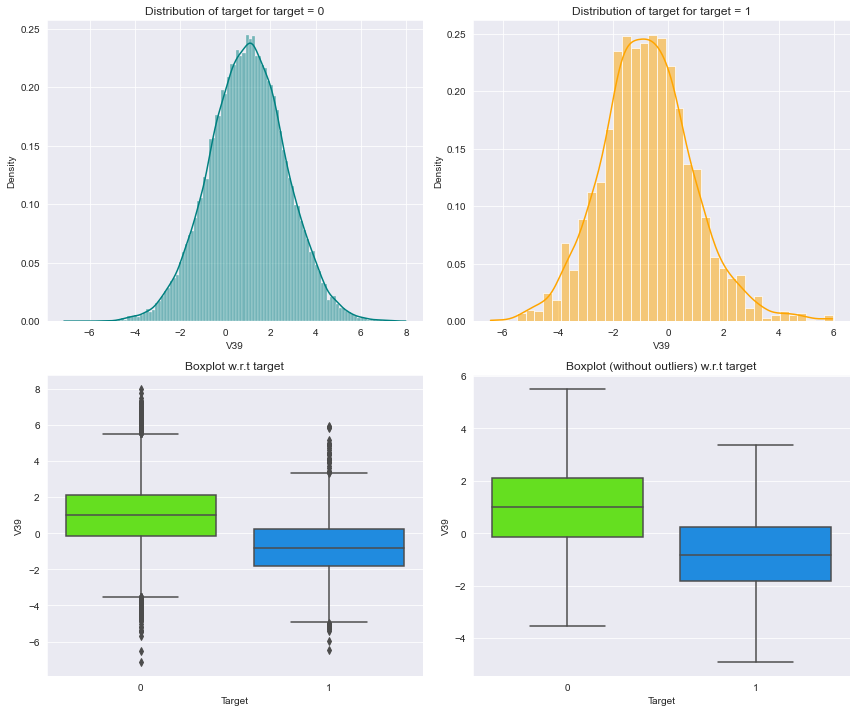

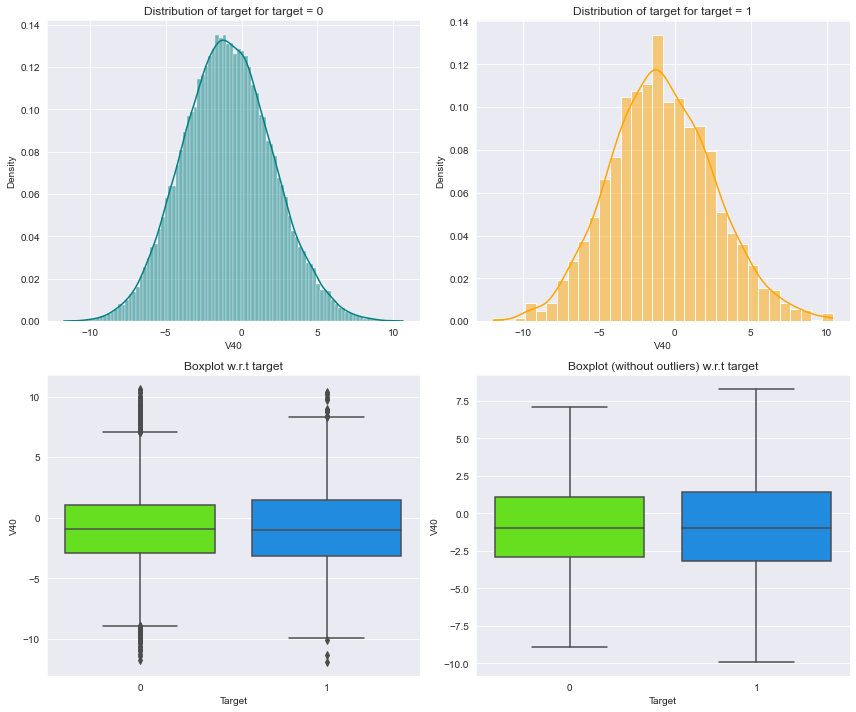

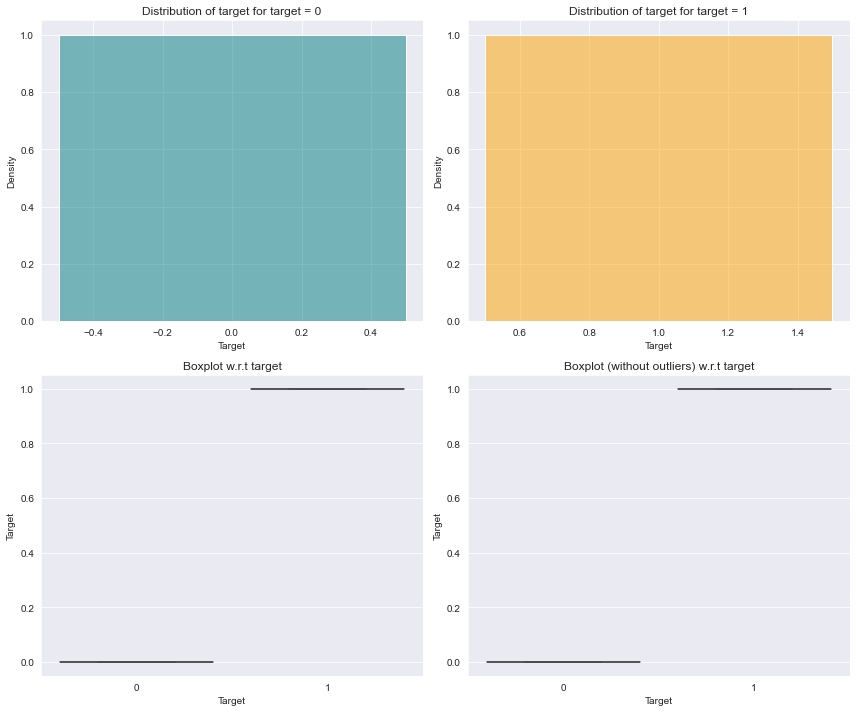

In [21]:
# Plotting distribution of all features with respect to the target in one go
for feature in data.columns:
    distribution_plot_wrt_target(data, feature, "Target")

### Observations

* Sensor columns V1-V40 have outliers on both sides of the boxplot as seen in the in both univariate and bivariate analyses.
* Since the sensors in the dataset are ciphered, it is difficult to determine whether the outlier values are legitimate or anomalous. As such, there are no plans to do any outlier treatment on the data and except for the missing values (which will be imputed) the data will be used as is in modeling.

## Data Pre-processing

In [22]:
# Separating target variable and other variables
X = data.drop(columns = "Target")

Y = data["Target"]

In [23]:
# Splitting data into training and validation. Not splitting into test since there is separate test data.

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.25, random_state = 1, stratify = Y)

print(X_train.shape, X_val.shape)

(30000, 40) (10000, 40)


In [24]:
# Handling missing values
# Imputing the missing values for V1 and V2. Doing this after the split in data to avoid data leakage
imp_median = SimpleImputer(missing_values = np.nan, strategy = "median")

# For V1, fit the imputer on train data and transform the train data
X_train["V1"] = imp_median.fit_transform(X_train[["V1"]])

# For V1, transform the validation data using the imputer fit on train data
X_val["V1"] = imp_median.transform(X_val[["V1"]])

# For V2, fit the imputer on train data and transform the train data
X_train["V2"] = imp_median.fit_transform(X_train[["V2"]])

# For V2, transform the validation data using the imputer fit on train data
X_val["V2"] = imp_median.transform(X_val[["V2"]])

In [25]:
# Verifying there are no missing values in training
print("Total number of missing values (if any) is", X_train.isnull().sum().sum())

Total number of missing values (if any) is 0


In [26]:
# Verifying there are no missing values in validation
print("Total number of missing values (if any) is", X_val.isnull().sum().sum())

Total number of missing values (if any) is 0


In [27]:
# Checking class balance for whole data, train set and validation set

print("Target value ratio in y")
print(Y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)

Target value ratio in y
0   0.945
1   0.055
Name: Target, dtype: float64
********************************************************************************
Target value ratio in y_train
0   0.945
1   0.055
Name: Target, dtype: float64
********************************************************************************
Target value ratio in y_val
0   0.945
1   0.055
Name: Target, dtype: float64
********************************************************************************


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Defining a function to output different metrics (including recall) on the train and validation set, and a function to show confusion matrix to avoid writing code each time.**

In [28]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index = [0],
    )

    return df_perf

In [29]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize = (6, 4))
    sns.heatmap(cm, annot = labels, fmt = "")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [30]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

In [31]:
# Empty list to store all the models
models = []

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state = 1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state = 1)))
models.append(("Bagging", BaggingClassifier(random_state = 1)))
models.append(("Random Forest", RandomForestClassifier(random_state = 1)))
models.append(("GBM", GradientBoostingClassifier(random_state = 1)))
models.append(("Adaboost", AdaBoostClassifier(random_state = 1)))
models.append(("XGBoost", XGBClassifier(random_state = 1, eval_metric = "logloss")))

# Empty list to store all model's CV scores
results = []

# Empty list to store name of the models
names = [] 

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Score on Original Training Data:" "\n")

for name, model in models:
    # Setting number of splits equal to 5
    kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)  
    cv_result = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = scorer, cv = kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Recall Score on Original Training Data:" "\n")

for name, model in models:
    model1 = model.fit(X_train, y_train)
    pred_train = model1.predict(X_train)
    rec_score = recall_score(y_train, pred_train)
    print("{}: {}".format(name, rec_score))
    
print("\n" "Recall Score on Original Validation Data:" "\n")

for name, model in models:
    model1 = model.fit(X_train, y_train)
    pred_val = model1.predict(X_val)
    rec_score = recall_score(y_val, pred_val)
    print("{}: {}".format(name, rec_score))
    
print("\n" "Accuracy Score on Original Training Data:" "\n")

for name, model in models:
    model1 = model.fit(X_train, y_train)
    pred_train = model1.predict(X_train)
    acc_score = accuracy_score(y_train, pred_train)
    print("{}: {}".format(name, acc_score))
    
print("\n" "Accuracy Score on Original Validation Data:" "\n")

for name, model in models:
    model1 = model.fit(X_train, y_train)
    pred_val = model1.predict(X_val)
    acc_score = accuracy_score(y_val, pred_val)
    print("{}: {}".format(name, acc_score))


Cross-Validation Score on Original Training Data:

Logistic Regression: 0.48292682926829267
Decision Tree: 0.7335365853658538
Bagging: 0.7347560975609755
Random Forest: 0.7621951219512195
GBM: 0.7170731707317073
Adaboost: 0.6164634146341463
XGBoost: 0.8158536585365853

Recall Score on Original Training Data:

Logistic Regression: 0.4853658536585366
Decision Tree: 1.0
Bagging: 0.9439024390243902
Random Forest: 1.0
GBM: 0.7804878048780488
Adaboost: 0.6371951219512195
XGBoost: 1.0

Recall Score on Original Validation Data:

Logistic Regression: 0.4625228519195612
Decision Tree: 0.7477148080438757
Bagging: 0.7349177330895795
Random Forest: 0.7659963436928702
GBM: 0.7148080438756855
Adaboost: 0.6142595978062158
XGBoost: 0.8263254113345521

Accuracy Score on Original Training Data:

Logistic Regression: 0.9673
Decision Tree: 1.0
Bagging: 0.9969
Random Forest: 1.0
GBM: 0.9871666666666666
Adaboost: 0.9758666666666667
XGBoost: 1.0

Accuracy Score on Original Validation Data:

Logistic Regressi

### Observations on original data

* The goal for a model will be to maximize Recall to reduce False Negatives, which in this case is the model failing to predict a failure. The cost of a failure could be \\$15,000 to repair or \\$40,000 to replace.
* 7 models were trained on the original training and validation data, the top performing models for Recall (rounded to two decimal places) are:

    1. XGBoost (Training - 1.0, Validation - 0.83)
    2. Random Forest (Training - 1.0, Validation - 0.77)
    3. Decision Tree (Training - 1.0, Validation - 0.75)
    4. Bagging (Training - 0.94, Validation - 0.73)
    5. Gradient Boost (Training - 0.78, Validation - 0.71)
    6. AdaBoost (Training - 0.64, Validation - 0.61)
    7. Logistic Regression (Training - 0.49, Validation - 0.46)


* The XGBoost model has the highest Recall on the validation data and generalizes the best on both training and validation data out of the seven models trained and validated on the original data.
* Going to see if oversampling and undersampling improves Recall for the models.

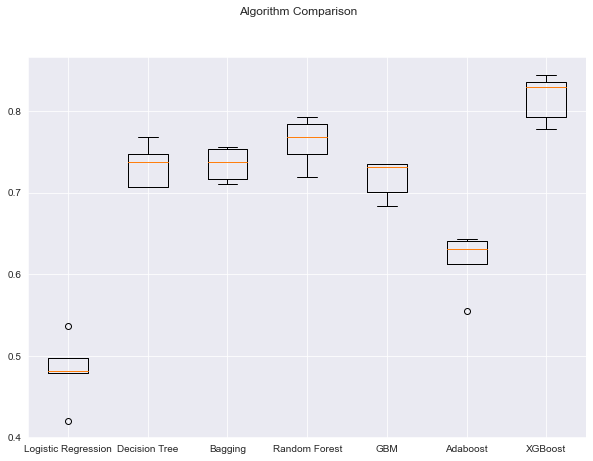

In [32]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### After checking the performance, reviewing the confusion matrices of the train and validation data

Text(43.0, 0.5, 'Actual Values')

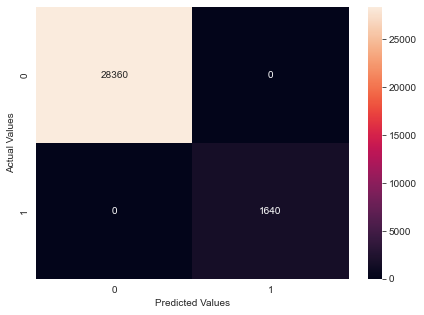

In [33]:
# Confusion matrix for train data
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize = (7, 5))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

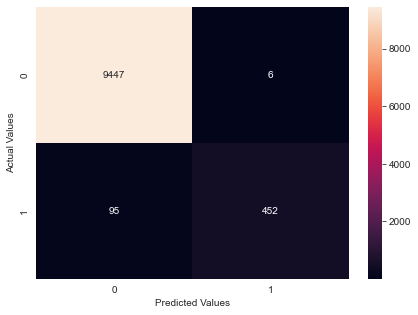

In [34]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (7, 5))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### Observations on the Confusion Matrix on the original data
* In the original training data confusion matrix, the number of False Negatives is 0.
* However, in the original validation data confusion matrix, the number of False Negatives is 95.

### Model Building with Oversampled data


In [35]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, k_neighbors = 5, random_state = 1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [36]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1640
Before OverSampling, count of label '0': 28360 

After OverSampling, count of label '1': 28360
After OverSampling, count of label '0': 28360 

After OverSampling, the shape of train_X: (56720, 40)
After OverSampling, the shape of train_y: (56720,) 



In [37]:
# Empty list to store all the models
models_over = []

# Appending models into the list
models_over.append(("Logistic Regression_oversampled", LogisticRegression(random_state = 1)))
models_over.append(("Decision Tree_oversampled", DecisionTreeClassifier(random_state = 1)))
models_over.append(("Bagging_oversampled", BaggingClassifier(random_state = 1)))
models_over.append(("Random forest_oversampled", RandomForestClassifier(random_state = 1)))
models_over.append(("GBM_oversampled", GradientBoostingClassifier(random_state = 1)))
models_over.append(("Adaboost_oversampled", AdaBoostClassifier(random_state = 1)))
models_over.append(("XGBoost_oversampled", XGBClassifier(random_state = 1, eval_metric = "logloss")))

print("\n" "Recall Score on Oversampled Training Data:" "\n")

for name, model in models_over:
    model1 = model.fit(X_train_over, y_train_over)
    pred_train = model1.predict(X_train_over)
    rec_score = recall_score(y_train_over, pred_train)
    print("{}: {}".format(name, rec_score))
    
print("\n" "Recall Score on Oversampled Validation Data:" "\n")

for name, model in models_over:
    model1 = model.fit(X_train_over, y_train_over)
    pred_val = model1.predict(X_val)
    rec_score = recall_score(y_val, pred_val)
    print("{}: {}".format(name, rec_score))
    
print("\n" "Accuracy Score on Oversampled Training Data:" "\n")

for name, model in models_over:
    model1 = model.fit(X_train_over, y_train_over)
    pred_train = model1.predict(X_train_over)
    acc_score = accuracy_score(y_train_over, pred_train)
    print("{}: {}".format(name, acc_score))
    
print("\n" "Accuracy Score on Oversampled Validation Data:" "\n")

for name, model in models_over:
    model1 = model.fit(X_train_over, y_train_over)
    pred_val = model1.predict(X_val)
    acc_score = accuracy_score(y_val, pred_val)
    print("{}: {}".format(name, acc_score))


Recall Score on Oversampled Training Data:

Logistic Regression_oversampled: 0.8755641748942172
Decision Tree_oversampled: 1.0
Bagging_oversampled: 0.9982722143864599
Random forest_oversampled: 1.0
GBM_oversampled: 0.9144922425952046
Adaboost_oversampled: 0.8938293370944993
XGBoost_oversampled: 0.9986248236953456

Recall Score on Oversampled Validation Data:

Logistic Regression_oversampled: 0.8391224862888482
Decision Tree_oversampled: 0.8135283363802559
Bagging_oversampled: 0.8354661791590493
Random forest_oversampled: 0.8683729433272395
GBM_oversampled: 0.8811700182815356
Adaboost_oversampled: 0.850091407678245
XGBoost_oversampled: 0.8793418647166362

Accuracy Score on Oversampled Training Data:

Logistic Regression_oversampled: 0.87438293370945
Decision Tree_oversampled: 1.0
Bagging_oversampled: 0.9989245416078985
Random forest_oversampled: 1.0
GBM_oversampled: 0.9436177715091678
Adaboost_oversampled: 0.9046544428772919
XGBoost_oversampled: 0.9990126939351199

Accuracy Score on Ov

### Observations on oversampled data

* The goal for a model will be to maximize Recall to reduce False Negatives, which in this case is the model failing to predict a failure. The cost of a failure could be \\$15,000 to repair or \\$40,000 to replace.
* 7 models were trained on oversampled training and validation data, the top performing models for Recall (rounded to two decimal places) are:

    1. Gradient Boost (Training - 0.91, Validation - 0.88)
    2. AdaBoost (Training - 0.89, Validation - 0.85)
    3. Logistic Regression (Training - 0.88, Validation - 0.84)
    4. XGBoost (Training - 1.0, Validation - 0.88)
    5. Random Forest (Training - 1.0, Validation - 0.87)
    6. Bagging (Training - 1.0, Validation - 0.84)
    7. Decision Tree (Training - 1.0, Validation - 0.81)


* The Gradient Boost model has the highest Recall on the oversampled validation data and generalizes the best on both oversampled training and validation data of the 7 models.
* Going to see if undersampling improves Recall for the models.

### After checking the performance, reviewing the confusion matrices of the train and validation data

Text(43.0, 0.5, 'Actual Values')

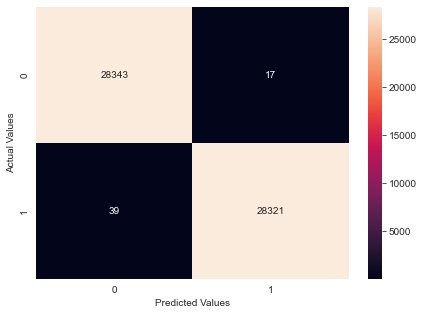

In [38]:
# Confusion matrix for oversampled train data
cm = confusion_matrix(y_train_over, pred_train)
plt.figure(figsize = (7, 5))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

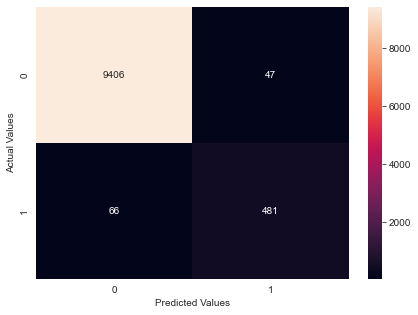

In [39]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize = (7, 5))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### Observations on the Confusion Matrix on the oversampled data
* In the oversampled training data confusion matrix, the number of False Negatives is 0.
* However, in the validation data confusion matrix, the number of False Negatives is now 66.

### Model Building with Undersampled data

In [40]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [41]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_under == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_under == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Under Sampling, count of label '1': 1640
Before Under Sampling, count of label '0': 28360 

After Under Sampling, count of label '1': 1640
After Under Sampling, count of label '0': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



In [42]:
# Empty list to store all the models
models_under = []

# Appending models into the list
models_under.append(("Logistic Regression_undersampled", LogisticRegression(random_state = 1)))
models_under.append(("Decision Tree_undersampled", DecisionTreeClassifier(random_state = 1)))
models_under.append(("Bagging_undersampled", BaggingClassifier(random_state = 1)))
models_under.append(("Random Forest_undersampled", RandomForestClassifier(random_state = 1)))
models_under.append(("GBM_undersampled", GradientBoostingClassifier(random_state = 1)))
models_under.append(("AdaBoost_undersampled", AdaBoostClassifier(random_state = 1)))
models_under.append(("XGBoost_undersampled", XGBClassifier(random_state = 1, eval_metric = "logloss")))

print("\n" "Recall Score on Undersampled Training Data:" "\n")

for name, model in models_under:
    model1 = model.fit(X_train_under, y_train_under)
    pred_train = model1.predict(X_train_under)
    rec_score = recall_score(y_train_under, pred_train)
    print("{}: {}".format(name, rec_score))
    
print("\n" "Recall Score on Undersampled Validation Data:" "\n")

for name, model in models_under:
    model1 = model.fit(X_train_under, y_train_under)
    pred_val = model1.predict(X_val)
    rec_score = recall_score(y_val, pred_val)
    print("{}: {}".format(name, rec_score))
    
print("\n" "Accuracy Score on Undersampled Training Data:" "\n")

for name, model in models_under:
    model1 = model.fit(X_train_under, y_train_under)
    pred_train = model1.predict(X_train_under)
    acc_score = accuracy_score(y_train_under, pred_train)
    print("{}: {}".format(name, acc_score))
    
print("\n" "Accuracy Score on Undersampled Validation Data:" "\n")

for name, model in models_under:
    model1 = model.fit(X_train_under, y_train_under)
    pred_val = model1.predict(X_val)
    acc_score = accuracy_score(y_val, pred_val)
    print("{}: {}".format(name, acc_score))


Recall Score on Undersampled Training Data:

Logistic Regression_undersampled: 0.8554878048780488
Decision Tree_undersampled: 1.0
Bagging_undersampled: 0.9798780487804878
Random Forest_undersampled: 1.0
GBM_undersampled: 0.9182926829268293
AdaBoost_undersampled: 0.8939024390243903
XGBoost_undersampled: 1.0

Recall Score on Undersampled Validation Data:

Logistic Regression_undersampled: 0.8464351005484461
Decision Tree_undersampled: 0.8537477148080439
Bagging_undersampled: 0.8628884826325411
Random Forest_undersampled: 0.8848263254113345
GBM_undersampled: 0.8884826325411335
AdaBoost_undersampled: 0.8647166361974405
XGBoost_undersampled: 0.9012797074954296

Accuracy Score on Undersampled Training Data:

Logistic Regression_undersampled: 0.8594512195121952
Decision Tree_undersampled: 1.0
Bagging_undersampled: 0.9890243902439024
Random Forest_undersampled: 1.0
GBM_undersampled: 0.9521341463414634
AdaBoost_undersampled: 0.9060975609756098
XGBoost_undersampled: 1.0

Accuracy Score on Under

### Observations on undersampled data

* The goal for a model will be to maximize Recall to reduce False Negatives, which in this case is the model failing to predict a failure. The cost of a failure could be \\$15,000 to repair or \\$40,000 to replace.
* 7 models were trained on undersampled training and validation data, the top performing models for Recall (rounded to two decimal places) are:

    1. Gradient Boost (Training - 0.92, Validation - 0.89)
    2. AdaBoost (Training - 0.89, Validation - 0.86)
    3. XGBoost (Training - 1.0, Validation - 0.90)
    4. Random Forest (Training - 1.0, Validation - 0.88)
    5. Bagging (Training - 0.98, Validation - 0.86)
    6. Logistic Regression (Training - 0.86, Validation - 0.85)
    7. Decision Tree (Training - 1.0, Validation - 0.85)
    

* The Gradient Boost model has the highest Recall on the undersampled validation data and generalizes the best on both undersampled training and validation data of the 7 models.

### After checking the performance, reviewing the confusion matrices of the train and validation data

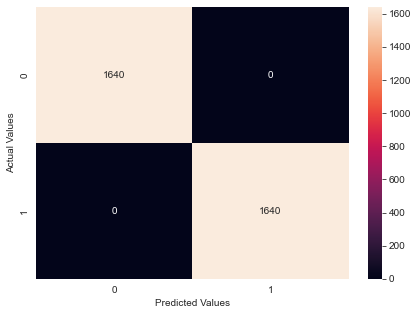

In [43]:
# Confusion matrix for undersampled train data
cm = confusion_matrix(y_train_under, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

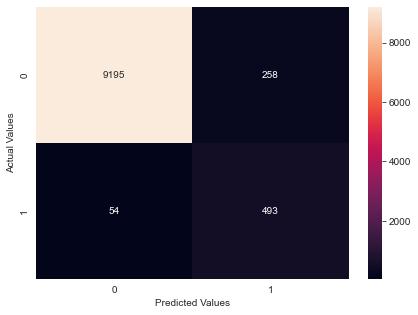

In [44]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

### Observations on the Confusion Matrix on the undesampled data
* In the undersampled training data confusion matrix, the number of False Negatives is 0.
* However, in the validation data confusion matrix, the number of False Negatives is now 54.

### Selecting the top three models for tuning
* After reviewing the 21 models, selecting the top three generalized models for Recall for hyperparameter tuning to see if further improvements on Recall can be made.

* The top three generalized models for Recall (rounded to two decimal places) are:
    1. Gradient Boost (Undersampled Data) with Training of 0.92 and Validation of 0.89.
    2. Gradient Boost (Oversampled Data) with Training of 0.91 and Validation of 0.88.
    3. AdaBoost (Undersampled Data) with Training of 0.89 and Validation of 0.86.
    
    
* Other models had higher Recall for Training (in some cases, they were 1.0 on the training data suggesting the model is overfit), however, other models didn't generalize as well on both training and validation data like these models did.

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Tuning method for GradientBoost with oversampled data

In [45]:
# Defining Gradient Boost
Model = GradientBoostingClassifier(random_state = 1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100, 150, 25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5, 0.7], "max_features":[0.5, 0.7]}

# Calling RandomizedSearchCV
gradient_boost_over = RandomizedSearchCV(estimator = Model, param_distributions = param_grid, n_iter = 10, n_jobs = -1, scoring = scorer, cv = 5, random_state = 1)

# Fitting parameters in RandomizedSearchCV
gradient_boost_over.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score = {}:" .format(gradient_boost_over.best_params_, gradient_boost_over.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score = 0.9558533145275036:


In [46]:
# Calculating different metrics on oversampled train set
gradient_boost_over_train = model_performance_classification_sklearn(gradient_boost_over, X_train_over, y_train_over)
print("Training performance:")
gradient_boost_over_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.982   0.978      0.985 0.982

In [47]:
# Calculating different metrics on oversampled validation set
gradient_boost_over_val = model_performance_classification_sklearn(gradient_boost_over, X_val, y_val)
print("Validation performance:")
gradient_boost_over_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.966   0.878      0.633 0.736

### Tuning method for GradientBoost with undersampled data

In [48]:
# Defining Gradient Boost
Model = GradientBoostingClassifier(random_state = 1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100, 150, 25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5, 0.7], "max_features":[0.5, 0.7]}

# Calling RandomizedSearchCV
gradient_boost_under = RandomizedSearchCV(estimator = Model, param_distributions = param_grid, n_iter = 10, n_jobs = -1, scoring = scorer, cv = 5, random_state = 1)

# Fitting parameters in RandomizedSearchCV
gradient_boost_under.fit(X_train_under, y_train_under)

print("Best parameters are {} with CV score = {}:" .format(gradient_boost_under.best_params_, gradient_boost_under.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score = 0.9030487804878048:


In [49]:
# Calculating different metrics on undersampled train set
gradient_boost_under_train = model_performance_classification_sklearn(gradient_boost_under, X_train_under, y_train_under)
print("Training performance:")
gradient_boost_under_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.977   0.960      0.994 0.977

In [50]:
# Calculating different metrics on undersampled validation set
gradient_boost_under_val = model_performance_classification_sklearn(gradient_boost_under, X_val, y_val)
print("Validation performance:")
gradient_boost_under_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.935   0.899      0.453 0.603

### Tuning method for AdaBoost with undersampled data

In [51]:
# Defining AdaBoost
Model = AdaBoostClassifier(random_state = 1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [100, 150, 200], "learning_rate": [0.2, 0.05], "base_estimator": [DecisionTreeClassifier(max_depth = 1, random_state = 1), DecisionTreeClassifier(max_depth = 2, random_state = 1), DecisionTreeClassifier(max_depth = 3, random_state = 1)]}

# Calling RandomizedSearchCV
adaboost_under = RandomizedSearchCV(estimator = Model, param_distributions = param_grid, n_iter = 10, n_jobs = -1, scoring = scorer, cv = 5, random_state = 1)

# Fitting parameters in RandomizedSearchCV
adaboost_under.fit(X_train_under, y_train_under)

print("Best parameters are {} with CV score = {}:" .format(adaboost_under.best_params_, adaboost_under.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score = 0.8932926829268293:


In [52]:
# Calculating different metrics on undersampled train set
adaboost_under_train = model_performance_classification_sklearn(adaboost_under, X_train_under, y_train_under)
print("Training performance:")
adaboost_under_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [53]:
# Calculating different metrics on undersampled validation set
adaboost_under_val = model_performance_classification_sklearn(adaboost_under, X_val, y_val)
print("Validation performance:")
adaboost_under_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.945   0.894      0.501 0.642

## Model performance comparison and choosing the final model

In [54]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        gradient_boost_over_train.T,
        gradient_boost_under_train.T,
        adaboost_under_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Gradient Boost (Oversampled data)",
    "Tuned Gradient Boost (Undersampled data)",
    "Tuned AdaBoost (Undersampled data)"
]
print("RandomizedSearchCV: Training performance comparison:")
models_train_comp_df

RandomizedSearchCV: Training performance comparison:


Tuned Gradient Boost (Oversampled data)  \
Accuracy                                     0.982   
Recall                                       0.978   
Precision                                    0.985   
F1                                           0.982   

           Tuned Gradient Boost (Undersampled data)  \
Accuracy                                      0.977   
Recall                                        0.960   
Precision                                     0.994   
F1                                            0.977   

           Tuned AdaBoost (Undersampled data)  
Accuracy                                1.000  
Recall                                  1.000  
Precision                               1.000  
F1                                      1.000

In [55]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        gradient_boost_over_val.T,
        gradient_boost_under_val.T,
        adaboost_under_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuned Gradient Boost (Oversampled data)",
    "Tuned Gradient Boost (Undersampled data)",
    "Tuned AdaBoost (Undersampled data)"
]
print("RandomizedSearchCV: Validation performance comparison:")
models_val_comp_df

RandomizedSearchCV: Validation performance comparison:


Tuned Gradient Boost (Oversampled data)  \
Accuracy                                     0.966   
Recall                                       0.878   
Precision                                    0.633   
F1                                           0.736   

           Tuned Gradient Boost (Undersampled data)  \
Accuracy                                      0.935   
Recall                                        0.899   
Precision                                     0.453   
F1                                            0.603   

           Tuned AdaBoost (Undersampled data)  
Accuracy                                0.945  
Recall                                  0.894  
Precision                               0.501  
F1                                      0.642

### Observations on Hyperparameter Tuned Models

* After tuning the hyperparameters, the top three generalized models for Recall (rounded to decimal places) are:
    1. Tuned Gradient Boost (Undersampled Data) with Training of 0.96 and Validation of 0.90.
    2. Tuned Gradient Boost (Oversampled Data) with Training of 0.98 and Recall of 0.88.
    3. Tuned AdaBoost (Undersampled Data) with Training of 1.00 and Recall of 0.89.


* The top three (non-hyperparameter tuned) generalized models for Recall (rounded to two decimal places) are:
    1. Gradient Boost (Undersampled Data) with Training of 0.92 and Validation of 0.89.
    2. Gradient Boost (Oversampled Data) with Training of 0.91 and Validation of 0.88.
    3. AdaBoost (Undersampled Data) with Training of 0.89 and Validation of 0.86.
    
    
* The hyperparameter tuning difference led to a very small improvement in Recall. 
* The top model is the Tuned Gradient Boost (Undersampled Data). The optimal parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2}.
* Will test the Tuned Gradient Boost (Undersampled Data) model on the test data to see how it does.

### Test set final performance

In [56]:
# Defining Gradient Boost
Model = GradientBoostingClassifier(random_state = 1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100, 150, 25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5, 0.7], "max_features":[0.5, 0.7]}

# Calling RandomizedSearchCV
gradient_boost_under = RandomizedSearchCV(estimator = Model, param_distributions = param_grid, n_iter = 10, n_jobs = -1, scoring = scorer, cv = 5, random_state = 1)

# Fitting parameters in RandomizedSearchCV
optimal_tuned_gradient_boost = gradient_boost_under.fit(X_train_under, y_train_under)

print("Best parameters are {} with CV score = {}:" .format(gradient_boost_under.best_params_, gradient_boost_under.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score = 0.9030487804878048:


In [57]:
# Loading test data
test = pd.read_csv("Test.csv")

# Checking if there are any missing values
print(test.isnull().sum().sort_values(ascending=False))

print("True or False, are there any missing values?", test.isnull().values.any())

print("Total number of missing values (if any) is", test.isnull().sum().sum())

V1        11
V2         7
V40        0
V30        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V31        0
V39        0
V22        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V32        0
V21        0
V20        0
V10        0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V11        0
V19        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
Target     0
dtype: int64
True or False, are there any missing values? True
Total number of missing values (if any) is 18


In [58]:
# Handling missing values
# Imputing the missing values for V1 and V2. Using the same approach that was done for train dataset
imp_median = SimpleImputer(missing_values = np.nan, strategy = "median")

# For V1, fit the imputer on train data and transform the train data
test["V1"] = imp_median.fit_transform(test[["V1"]])

# For V2, transform the validation data using the imputer fit on train data
test["V2"] = imp_median.transform(test[["V2"]])

# Verifying there are no missing values in test data set
print("Total number of missing values (if any) is", test.isnull().sum().sum())

Total number of missing values (if any) is 0


In [59]:
# Separating the independent and dependent variables
x_test = test.drop(columns = "Target")
y_test = test["Target"]

In [60]:
# Testing how the optimal tuned Gradient Boost does on the test data
model_performance_classification_sklearn(optimal_tuned_gradient_boost, x_test, y_test)

Accuracy  Recall  Precision    F1
0     0.933   0.874      0.443 0.588

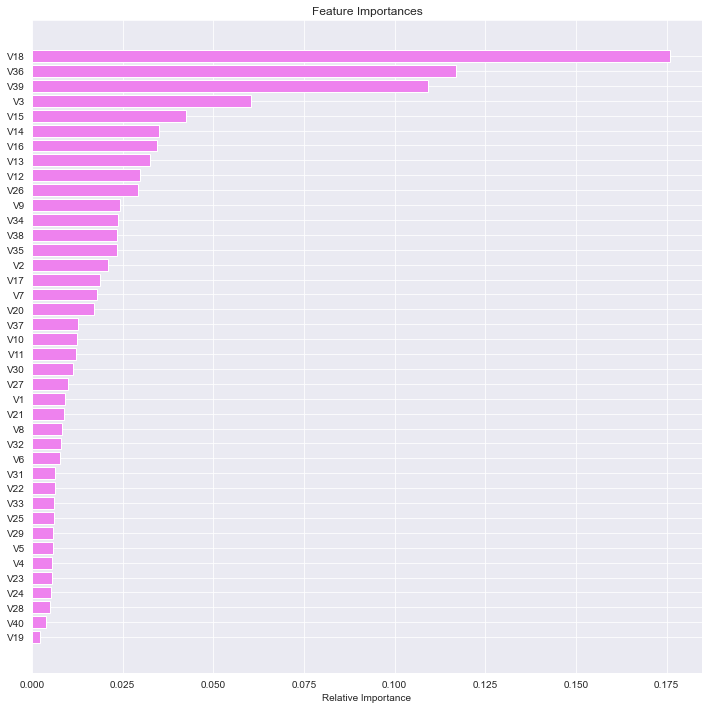

In [61]:
# Seeing which features are importance for generating predictions
feature_names = X.columns
importances = optimal_tuned_gradient_boost.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "violet", align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations
* The Tuned Gradient Boost on Undersampled Data has a good Recall of 0.87 on test data.
* Per the Feature Importances plot, the top three features that impacted prediction were V18, V36, and V39.

## Pipelines to build the final model

In [62]:
# Creating a list of numerical variables
numerical_features = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "V29",
    "V30",
    "V31",
    "V32",
    "V33",
    "V34",
    "V35",
    "V36",
    "V37",
    "V38",
    "V39",
    "V40",
]

# Separating target variable and other variables
X = data.drop(columns = "Target")
Y = data["Target"]

In [63]:
# Since it is already known what the best model is, the data won't be split into three parts

# Splitting the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.30, random_state = 1, stratify = Y)
print(X_train.shape, X_val.shape)

(28000, 40) (12000, 40)


In [64]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [65]:
# Creating a transformer for numerical variables, which will apply simple imputer on the numerical variables for any missing values

#Imputation will happen on the data after the data has been split to avoid data leakage
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy = "median"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features)],
    remainder = "passthrough",
)

In [66]:
# Creating new pipeline with best parameters for training the model
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GB",
            GradientBoostingClassifier(
                subsample = 0.5, 
                n_estimators = 125, 
                max_features = 0.5, 
                learning_rate = 0.2,
            ),
        ),
    ]
)
# Fitting the model on training data
model.fit(X_train_under, y_train_under)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...])])),
                ('GB',
                 GradientBoostingCl

In [67]:
# Making predictions on the test dataset using the created model pipleline
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Business Insights and Conclusions

* The model selection and tuning process focused on optimizing for Recall as a higher Recall would lead to a lower False Negative rate from the model.
* A False Negative is where the model predicted that a wind turbine wouldn't fail when in reality it did fail. 
* By erring on the side of reducing False Negatives, that cuts down on maintenance costs whether it is repair costs of \\$15,000 or replacement costs of \\$40,000.
* The selected model (a Tuned Gradient Boost model that performed on undersampled data) provided the best Recall score on both training (0.96) and validation data (0.90) and did well on test data (0.87).
* In general, the models performed better on either oversampled or undersampled data due to how imbalanced the training data was.
    * The Gradient Boost model on the original training and validation data had a Recall of 0.78 on training data, and 0.71 on validation data.
    * This means using the Tuned Gradient Boost model that performed on undersampled data reduces the False Negatives between 18-19%! 
* For the Tuned Gradient Boost model on undersampled data, the top three features that impacted prediction were V18, V36, and V39.
* Since the values are ciphered, it is unclear which part of the wind turbine V18, V36, and V39 are. However, the next time a scheduled inspection or routine maintenance occurs, it might be a good idea to review the maintenance records for those components as well as the design specifications to see if they have been maintained or if they are exceeding design specifications.
* Also might be worthwhile to buy better components for V18, V36, and V39 to further reduce the risk of failures.